## Topic Modeling

In [70]:
import pandas as pd
import spacy
from gensim.models import Phrases
from gensim import models,corpora
from tqdm import tqdm,tqdm_gui
from tqdm._tqdm_notebook import tqdm_notebook
from pathlib import Path
import pickle
import numpy as np
from multiprocessing import Pool
import warnings
import logging
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [26]:
PATH = Path('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge')
list(PATH.iterdir())

[PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.200d.txt'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.zip'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/train.tsv'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/test.tsv'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.100d.txt'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.300d.txt'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.50d.txt')]

In [27]:
train_df = pd.read_csv(PATH/'train.tsv',sep = '\t')

In [28]:
nlp = spacy.load('en')

In [144]:
with open('text_tokens_valid.pkl','rb') as f:
    tokenized_text_test = pickle.load(f)

with open('text_tokens_train.pkl','rb') as f:
    tokenized_text = pickle.load(f)

In [145]:
tokenized_text += tokenized_text_test

In [13]:
review_len_test = [len(x) for x in tokenized_text_test]
review_len = [len(x) for x in tokenized_text]
np.percentile(review_len,95)

55.0

In [80]:
from multiprocessing import Pool

def bigramModel(review):
    return bigram_model[review]
bigram_model = Phrases(tokenized_text,scoring='npmi',threshold=0.5,min_count=100)
p = Pool(24)
processed_bigram_reviews = p.map(bigramModel,tokenized_text)

INFO : collecting all words and their counts
INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO : PROGRESS: at sentence #10000, processed 212777 words and 117576 word types
INFO : PROGRESS: at sentence #20000, processed 427771 words and 203227 word types
INFO : PROGRESS: at sentence #30000, processed 643205 words and 278290 word types
INFO : PROGRESS: at sentence #40000, processed 857555 words and 347115 word types
INFO : PROGRESS: at sentence #50000, processed 1072517 words and 410024 word types
INFO : PROGRESS: at sentence #60000, processed 1284386 words and 468275 word types
INFO : PROGRESS: at sentence #70000, processed 1498844 words and 524867 word types
INFO : PROGRESS: at sentence #80000, processed 1711750 words and 578535 word types
INFO : PROGRESS: at sentence #90000, processed 1925925 words and 629694 word types
INFO : PROGRESS: at sentence #100000, processed 2139448 words and 679079 word types
INFO : PROGRESS: at sentence #110000, processed 2353179 word

INFO : PROGRESS: at sentence #960000, processed 20458046 words and 3175479 word types
INFO : PROGRESS: at sentence #970000, processed 20669430 words and 3197080 word types
INFO : PROGRESS: at sentence #980000, processed 20882843 words and 3218738 word types
INFO : PROGRESS: at sentence #990000, processed 21094917 words and 3239744 word types
INFO : PROGRESS: at sentence #1000000, processed 21309038 words and 3260776 word types
INFO : PROGRESS: at sentence #1010000, processed 21521576 words and 3281811 word types
INFO : PROGRESS: at sentence #1020000, processed 21735337 words and 3303272 word types
INFO : PROGRESS: at sentence #1030000, processed 21948192 words and 3324630 word types
INFO : PROGRESS: at sentence #1040000, processed 22160342 words and 3345987 word types
INFO : PROGRESS: at sentence #1050000, processed 22372788 words and 3366620 word types
INFO : PROGRESS: at sentence #1060000, processed 22584391 words and 3387750 word types
INFO : PROGRESS: at sentence #1070000, processe

TypeError: decoding to str: need a bytes-like object, list found

Process ForkPoolWorker-395:
Process ForkPoolWorker-399:
Process ForkPoolWorker-392:
Process ForkPoolWorker-382:
Process ForkPoolWorker-389:
Process ForkPoolWorker-397:
Process ForkPoolWorker-403:
Process ForkPoolWorker-391:
Process ForkPoolWorker-383:
Traceback (most recent call last):
Process ForkPoolWorker-387:
Process ForkPoolWorker-386:
Process ForkPoolWorker-398:
Process ForkPoolWorker-396:
Process ForkPoolWorker-402:
Process ForkPoolWorker-394:
Process ForkPoolWorker-400:
Process ForkPoolWorker-393:
Process ForkPoolWorker-390:
Process ForkPoolWorker-388:
Process ForkPoolWorker-405:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-385:
Traceback (most recent call last):
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-404:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most re

  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/p

KeyboardInterrupt
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
KeyboardInterrupt
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/data/ssubrahmannian/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File

In [99]:
dictionary = corpora.Dictionary(processed_bigram_reviews)
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in tqdm(processed_bigram_reviews)]

INFO : adding document #0 to Dictionary(0 unique tokens: [])
INFO : adding document #10000 to Dictionary(16355 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #20000 to Dictionary(24783 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #30000 to Dictionary(31624 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #40000 to Dictionary(37732 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #50000 to Dictionary(43042 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #60000 to Dictionary(47886 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #70000 to Dictionary(52611 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #80000 to Dictionary(57072 unique 

INFO : adding document #650000 to Dictionary(218019 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #660000 to Dictionary(220246 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #670000 to Dictionary(222485 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #680000 to Dictionary(224799 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #690000 to Dictionary(227145 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #700000 to Dictionary(229279 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #710000 to Dictionary(231513 unique tokens: ['4+)/bottom', 'great_condition', 'kid', 'kid_boy', 'l']...)
INFO : adding document #720000 to Dictionary(233767 unique tokens: ['4+)/bottom', 'great_condition', 'ki

TypeError: decoding to str: need a bytes-like object, list found

In [ ]:
doc_term_matrix = p.map(dictionary.doc2bow,processed_bigram_reviews)

In [40]:
Lda = models.LdaMulticore
coherenceList_umass = []
num_topics_list = np.arange(5,30,5)
for num_topics in tqdm(num_topics_list):
    lda= Lda(doc_term_matrix, num_topics=num_topics,id2word = dictionary, 
             passes=3,chunksize=8000,random_state=43)
    cm = CoherenceModel(model=lda, corpus=doc_term_matrix, 
                        dictionary=dictionary, coherence='u_mass')
    coherenceList_umass.append(cm.get_coherence())
    vis = pyLDAvis.gensim.prepare(lda, doc_term_matrix, dictionary)
    pyLDAvis.save_html(vis,f'pyLDAvis_{num_topics}.html')
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.DEBUG)



  0%|          | 0/5 [00:00<?, ?it/s]INFO : using symmetric alpha at 0.2
INFO : using symmetric eta at 0.2
INFO : using serial LDA version on this node
INFO : running online LDA training, 5 topics, 3 passes over the supplied corpus of 1186028 documents, updating every 88000 documents, evaluating every ~880000 documents, iterating 50x with a convergence threshold of 0.001000
INFO : training LDA model using 11 processes
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker p

DEBUG : processing chunk #16 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 4814/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #17 of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #39 = documents up to #320000/1186028, outstanding queue size 31
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 4951/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 0, dispatched chunk #40 = documents up to #328000/1186028, outstanding queue size 31
DEBUG : processing chunk #18 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 4946/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INF

DEBUG : processing chunk #34 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 5839/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #35 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #57 = documents up to #464000/1186028, outstanding queue size 33
DEBUG : 5847/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 5910/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : 5928/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #36 of 8000 documents
DEBUG : performing inference on a chunk of 8

DEBUG : processing chunk #54 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 5944/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #0 (0.200): 0.024*"size" + 0.010*"1" + 0.009*"man" + 0.008*"home" + 0.008*"color" + 0.007*"black" + 0.007*"case" + 0.007*"2" + 0.007*"4" + 0.006*"home_décor"
INFO : topic #1 (0.200): 0.039*"woman" + 0.030*"size" + 0.010*"new" + 0.010*"black" + 0.010*"dress" + 0.010*"brand_new" + 0.009*"legging" + 0.009*"small" + 0.008*"pink" + 0.008*"rm"
INFO : topic #2 (0.200): 0.018*"woman" + 0.014*"black" + 0.010*"size" + 0.009*"color" + 0.008*"brand_new" + 0.008*"bag" + 0.008*"new" + 0.008*"bundle" + 0.006*"beauty_makeup" + 0.006*"woman_top"
INFO : topic #3 (0.200): 0.017*"new" + 0.010*"brand_new" + 0.009*"beauty_makeup" + 0.008*"woman" + 0.007*"item" + 0.007*"game" + 0.007*"shirt" + 0.006*"lip" + 0.006*"box" + 0.006*"1"
INFO : topic #4 

DEBUG : getting a new job
DEBUG : 6451/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #71 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
INFO : PROGRESS: pass 0, dispatched chunk #94 = documents up to #760000/1186028, outstanding queue size 33
DEBUG : processing chunk #72 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6418/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #73 of 8000 documents
DEBUG : 6447/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 0, dispatched chunk #95 = documents up to #768000/1186028, outstanding queue size 33
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 6441/8000 documents

DEBUG : result put
DEBUG : getting a new job
INFO : topic diff=0.155129, rho=0.122169
DEBUG : processing chunk #88 of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #109 = documents up to #880000/1186028, outstanding queue size 33
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #110 = documents up to #888000/1186028, outstanding queue size 33DEBUG : processing chunk #89 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents

INFO : PROGRESS: pass 0, dispatched chunk #111 = documents up to #896000/1186028, outstanding queue size 32
INFO : PROGRESS: pass 0, dispatched chunk #112 = documents up to #904000/1186028, outstanding queue size 33
DEBUG : 6792/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #90 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pa

DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #130 = documents up to #1048000/1186028, outstanding queue size 33
DEBUG : 6913/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #109 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #0 (0.200): 0.021*"size" + 0.011*"home" + 0.010*"1" + 0.010*"case" + 0.009*"man" + 0.008*"home_décor" + 0.008*"2" + 0.007*"3" + 0.007*"4" + 0.007*"color"
INFO : topic #1 (0.200): 0.043*"woman" + 0.033*"size" + 0.012*"black" + 0.011*"dress" + 0.010*"woman_athletic" + 0.010*"new" + 0.010*"legging" + 0.010*"small" + 0.010*"pink" + 0.009*"brand_new"
INFO : topic #2 (0.200): 0.018*"woman" + 0.013*"bag" + 0.012*"black" + 0.009*"color" + 0.008*"size" + 0.008*"brand_n

DEBUG : processing chunk #127 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7109/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7092/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #128 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7133/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #129 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #130 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7100/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : ge

INFO : topic #1 (0.200): 0.044*"woman" + 0.034*"size" + 0.012*"black" + 0.011*"dress" + 0.011*"woman_athletic" + 0.010*"pink" + 0.010*"legging" + 0.010*"small" + 0.010*"new" + 0.009*"lularoe"
INFO : topic #2 (0.200): 0.018*"woman" + 0.014*"bag" + 0.012*"black" + 0.009*"color" + 0.008*"woman_handbag" + 0.008*"bra" + 0.008*"brand_new" + 0.008*"new" + 0.008*"kid_toy" + 0.007*"size"
INFO : topic #3 (0.200): 0.016*"new" + 0.013*"beauty_makeup" + 0.012*"brand_new" + 0.009*"game" + 0.008*"item" + 0.007*"lip" + 0.007*"box" + 0.007*"2" + 0.007*"rm" + 0.007*"color"
INFO : topic #4 (0.200): 0.023*"size" + 0.021*"shirt" + 0.014*"shoe" + 0.012*"man" + 0.012*"pink" + 0.010*"new" + 0.010*"rm" + 0.010*"woman" + 0.009*"woman_top" + 0.009*"brand_new"
INFO : topic diff=0.132218, rho=0.089803
DEBUG : 7116/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7138/8000 documents converged within 50 iterations
DEBUG : p

DEBUG : processing chunk #8 of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #30 = documents up to #248000/1186028, outstanding queue size 30
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #31 = documents up to #256000/1186028, outstanding queue size 31
DEBUG : processing chunk #9 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7315/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #10 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #32 = documents up to #264000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 1, dispatched chunk #33 = documents up to #272000/1186028, outstanding queue size 32
DEBUG : processing chunk #11 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO :

DEBUG : 7336/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #29 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7365/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #30 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #52 = documents up to #424000/1186028, outstanding queue size 32
DEBUG : 7376/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 1, dispatched chunk #53 = documents up to #432000/1186028, outstanding queue size 33
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #31 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
DEB

DEBUG : 7459/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #46 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7447/8000 documents converged within 50 iterations
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #69 = documents up to #560000/1186028, outstanding queue size 33
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #47 of 8000 documents
DEBUG : 7394/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #48 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #70 = documents up to #568000/1186028, outstanding queue size 32
DEBUG : 7388/8000 documents

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #0 (0.200): 0.015*"size" + 0.015*"case" + 0.013*"home" + 0.011*"1" + 0.009*"home_décor" + 0.009*"2" + 0.008*"man" + 0.008*"electronic_cell" + 0.008*"phone_accessory" + 0.007*"3"
INFO : topic #1 (0.200): 0.044*"woman" + 0.036*"size" + 0.013*"black" + 0.012*"woman_athletic" + 0.012*"dress" + 0.011*"pink" + 0.010*"small" + 0.010*"legging" + 0.010*"new" + 0.009*"lularoe"
DEBUG : 7476/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #66 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #2 (0.200): 0.019*"woman" + 0.017*"bag" + 0.011*"black" + 0.010*"bra" + 0.010*"woman_handbag" + 0.009*"kid_toy" + 0.009*"color" + 0.008*"new" + 0.008*"brand_new" + 0.007*"purse"
DEBUG : result put
DEBUG : getting a new job
INFO : topic #3 (0.200): 0.016*"new" + 0.015*"beauty_makeup" + 0.012*"brand_new" + 0

DEBUG : getting a new job
DEBUG : 7510/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 1, dispatched chunk #105 = documents up to #848000/1186028, outstanding queue size 33
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #83 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #106 = documents up to #856000/1186028, outstanding queue size 33
DEBUG : processing chunk #84 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : 7465/8000 documents converged within 50 iterations
DEBUG : 7507/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : 7436/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : processed chunk, queuing the result
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
D

INFO : PROGRESS: pass 1, dispatched chunk #121 = documents up to #976000/1186028, outstanding queue size 31
DEBUG : processing chunk #99 of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #122 = documents up to #984000/1186028, outstanding queue size 32
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #123 = documents up to #992000/1186028, outstanding queue size 33
DEBUG : processing chunk #100 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #101 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7540/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7514/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #102 of 8000 documents
DEBUG : perform

INFO : merging changes from 96000 documents into a model of 1186028 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #119 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #120 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7537/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #0 (0.200): 0.016*"case" + 0.013*"home" + 0.012*"size" + 0.011*"1" + 0.010*"2" + 0.010*"home_décor" + 0.009*"phone_accessory" + 0.009*"electronic_cell" + 0.008*"3" + 0.007*"brand_new"
INFO : topic #1 (0.200): 0.044*"woman" + 0.036*"size" + 0.013*"black" + 0.013*"woman_athletic" + 0.012*"dress" + 0.012*"pink" + 0.011*"small" + 0.010*"legging" + 0.010*"lularoe" + 0.010*"new"
DEBUG : 7537/8000 documents converged within 50 iterations
INFO : topic #2 (0.200): 0.020*"woman" + 0.018*"bag" + 0.011*"bra" + 

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #139 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7583/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7600/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #140 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7566/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #141 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #142 of 8000 documents
DEBUG : performing inference on a chunk of 

INFO : PROGRESS: pass 2, dispatched chunk #11 = documents up to #96000/1186028, outstanding queue size 12
INFO : PROGRESS: pass 2, dispatched chunk #12 = documents up to #104000/1186028, outstanding queue size 13
INFO : PROGRESS: pass 2, dispatched chunk #13 = documents up to #112000/1186028, outstanding queue size 14
INFO : PROGRESS: pass 2, dispatched chunk #14 = documents up to #120000/1186028, outstanding queue size 15
INFO : PROGRESS: pass 2, dispatched chunk #15 = documents up to #128000/1186028, outstanding queue size 16
INFO : PROGRESS: pass 2, dispatched chunk #16 = documents up to #136000/1186028, outstanding queue size 17
INFO : PROGRESS: pass 2, dispatched chunk #17 = documents up to #144000/1186028, outstanding queue size 18
INFO : PROGRESS: pass 2, dispatched chunk #18 = documents up to #152000/1186028, outstanding queue size 19
INFO : PROGRESS: pass 2, dispatched chunk #19 = documents up to #160000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 2, dispatched ch

INFO : topic #4 (0.200): 0.029*"shirt" + 0.027*"size" + 0.018*"man" + 0.017*"shoe" + 0.012*"woman_top" + 0.011*"new" + 0.009*"pink" + 0.009*"blouse_t" + 0.009*"rm" + 0.009*"woman_jewelry"
DEBUG : getting a new job
DEBUG : processing chunk #22 of 8000 documents
INFO : topic diff=0.058725, rho=0.081311
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #43 = documents up to #352000/1186028, outstanding queue size 33
INFO : PROGRESS: pass 2, dispatched chunk #44 = documents up to #360000/1186028, outstanding queue size 33
DEBUG : 7591/8000 documents converged within 50 iterations
DEBUG : 7631/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : result put
DEBUG : 7607/8000 documents converged within 50 iterations
DEBUG : getting a new job
DEBUG : getting a new job
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : 

DEBUG : getting a new job
INFO : PROGRESS: pass 2, dispatched chunk #62 = documents up to #504000/1186028, outstanding queue size 32
DEBUG : 7659/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 2, dispatched chunk #63 = documents up to #512000/1186028, outstanding queue size 32
DEBUG : processing chunk #40 of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #41 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #42 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7659/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : 7640/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : proces

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7651/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 2, dispatched chunk #79 = documents up to #640000/1186028, outstanding queue size 32
DEBUG : 7644/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : processing chunk #57 of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : getting a new job
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #80 = documents up to #648000/1186028, outstanding queue size 30
DEBUG : processing chunk #58 of 8000 documents
DEBUG : 7624/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #59 of 8000 docume

DEBUG : 7682/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #0 (0.200): 0.019*"case" + 0.014*"home" + 0.011*"phone_accessory" + 0.011*"electronic_cell" + 0.011*"1" + 0.010*"2" + 0.010*"home_décor" + 0.009*"size" + 0.008*"new" + 0.008*"rm"
INFO : topic #1 (0.200): 0.044*"woman" + 0.038*"size" + 0.014*"woman_athletic" + 0.014*"black" + 0.012*"pink" + 0.012*"dress" + 0.011*"small" + 0.010*"legging" + 0.010*"lularoe" + 0.009*"new"
INFO : topic #2 (0.200): 0.023*"woman" + 0.020*"bag" + 0.012*"bra" + 0.012*"kid_toy" + 0.011*"woman_handbag" + 0.009*"black" + 0.008*"new" + 0.008*"brand_new" + 0.008*"color" + 0.008*"purse"
INFO : topic #3 (0.200): 0.017*"beauty_makeup" + 0.015*"new" + 0.013*"brand_new" + 0.010*"game" + 0.010*"item" + 0.009*"rm" + 0.009*"2" + 0.008*"color" + 0.008*"lip" + 0.008*"box"
DEBUG : result put
INFO : topic #4 (0.200): 0.030*"shirt" + 0.027*"size" + 0.020*"man" + 0.018*"s

DEBUG : processing chunk #93 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7698/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 2, dispatched chunk #116 = documents up to #936000/1186028, outstanding queue size 32
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7657/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7665/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #94 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : updating topics
DEBUG : getting a new job
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #95 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #96 of

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #110 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #111 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7677/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 2, dispatched chunk #133 = documents up to #1072000/1186028, outstanding queue size 32
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 2, dispatched chunk #134 = documents up to #1080000/1186028, outstanding queue size 33
DEBUG : processing chunk #112 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7695/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #113 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put

INFO : topic #2 (0.200): 0.024*"woman" + 0.020*"bag" + 0.013*"bra" + 0.012*"kid_toy" + 0.011*"woman_handbag" + 0.009*"black" + 0.009*"new" + 0.008*"brand_new" + 0.008*"purse" + 0.007*"color"
DEBUG : processing chunk #129 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #3 (0.200): 0.018*"beauty_makeup" + 0.015*"new" + 0.013*"brand_new" + 0.010*"game" + 0.010*"item" + 0.009*"rm" + 0.009*"2" + 0.009*"color" + 0.008*"lip" + 0.008*"box"
INFO : topic #4 (0.200): 0.031*"shirt" + 0.028*"size" + 0.022*"man" + 0.018*"shoe" + 0.012*"woman_top" + 0.011*"new" + 0.010*"woman_jewelry" + 0.009*"blouse_t" + 0.009*"kid_boy" + 0.008*"2"
INFO : topic diff=0.061695, rho=0.081311
DEBUG : 7672/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : 7717/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7729/8000 documents converged wit

INFO : topic diff=0.061712, rho=0.081311
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7669/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7685/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7747/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7704/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 40000 documents into a model of 1186028 documents
INFO : topic #0 (0.200): 0.020*"case" + 0.014*"home" + 0.012*"phone_accessory" + 0.012*"electronic_cell" + 0.010*"1" + 0.010*"2" + 0.010*"home_décor" + 0.009*"rm" + 0.008*"new" + 0.008*"3"
INFO : topic #1 (0.200): 0.044*

INFO : CorpusAccumulator accumulated stats from 98000 documents
INFO : CorpusAccumulator accumulated stats from 99000 documents
INFO : CorpusAccumulator accumulated stats from 100000 documents
INFO : CorpusAccumulator accumulated stats from 101000 documents
INFO : CorpusAccumulator accumulated stats from 102000 documents
INFO : CorpusAccumulator accumulated stats from 103000 documents
INFO : CorpusAccumulator accumulated stats from 104000 documents
INFO : CorpusAccumulator accumulated stats from 105000 documents
INFO : CorpusAccumulator accumulated stats from 106000 documents
INFO : CorpusAccumulator accumulated stats from 107000 documents
INFO : CorpusAccumulator accumulated stats from 108000 documents
INFO : CorpusAccumulator accumulated stats from 109000 documents
INFO : CorpusAccumulator accumulated stats from 110000 documents
INFO : CorpusAccumulator accumulated stats from 111000 documents
INFO : CorpusAccumulator accumulated stats from 112000 documents
INFO : CorpusAccumulator ac

INFO : CorpusAccumulator accumulated stats from 225000 documents
INFO : CorpusAccumulator accumulated stats from 226000 documents
INFO : CorpusAccumulator accumulated stats from 227000 documents
INFO : CorpusAccumulator accumulated stats from 228000 documents
INFO : CorpusAccumulator accumulated stats from 229000 documents
INFO : CorpusAccumulator accumulated stats from 230000 documents
INFO : CorpusAccumulator accumulated stats from 231000 documents
INFO : CorpusAccumulator accumulated stats from 232000 documents
INFO : CorpusAccumulator accumulated stats from 233000 documents
INFO : CorpusAccumulator accumulated stats from 234000 documents
INFO : CorpusAccumulator accumulated stats from 235000 documents
INFO : CorpusAccumulator accumulated stats from 236000 documents
INFO : CorpusAccumulator accumulated stats from 237000 documents
INFO : CorpusAccumulator accumulated stats from 238000 documents
INFO : CorpusAccumulator accumulated stats from 239000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 352000 documents
INFO : CorpusAccumulator accumulated stats from 353000 documents
INFO : CorpusAccumulator accumulated stats from 354000 documents
INFO : CorpusAccumulator accumulated stats from 355000 documents
INFO : CorpusAccumulator accumulated stats from 356000 documents
INFO : CorpusAccumulator accumulated stats from 357000 documents
INFO : CorpusAccumulator accumulated stats from 358000 documents
INFO : CorpusAccumulator accumulated stats from 359000 documents
INFO : CorpusAccumulator accumulated stats from 360000 documents
INFO : CorpusAccumulator accumulated stats from 361000 documents
INFO : CorpusAccumulator accumulated stats from 362000 documents
INFO : CorpusAccumulator accumulated stats from 363000 documents
INFO : CorpusAccumulator accumulated stats from 364000 documents
INFO : CorpusAccumulator accumulated stats from 365000 documents
INFO : CorpusAccumulator accumulated stats from 366000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 479000 documents
INFO : CorpusAccumulator accumulated stats from 480000 documents
INFO : CorpusAccumulator accumulated stats from 481000 documents
INFO : CorpusAccumulator accumulated stats from 482000 documents
INFO : CorpusAccumulator accumulated stats from 483000 documents
INFO : CorpusAccumulator accumulated stats from 484000 documents
INFO : CorpusAccumulator accumulated stats from 485000 documents
INFO : CorpusAccumulator accumulated stats from 486000 documents
INFO : CorpusAccumulator accumulated stats from 487000 documents
INFO : CorpusAccumulator accumulated stats from 488000 documents
INFO : CorpusAccumulator accumulated stats from 489000 documents
INFO : CorpusAccumulator accumulated stats from 490000 documents
INFO : CorpusAccumulator accumulated stats from 491000 documents
INFO : CorpusAccumulator accumulated stats from 492000 documents
INFO : CorpusAccumulator accumulated stats from 493000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 606000 documents
INFO : CorpusAccumulator accumulated stats from 607000 documents
INFO : CorpusAccumulator accumulated stats from 608000 documents
INFO : CorpusAccumulator accumulated stats from 609000 documents
INFO : CorpusAccumulator accumulated stats from 610000 documents
INFO : CorpusAccumulator accumulated stats from 611000 documents
INFO : CorpusAccumulator accumulated stats from 612000 documents
INFO : CorpusAccumulator accumulated stats from 613000 documents
INFO : CorpusAccumulator accumulated stats from 614000 documents
INFO : CorpusAccumulator accumulated stats from 615000 documents
INFO : CorpusAccumulator accumulated stats from 616000 documents
INFO : CorpusAccumulator accumulated stats from 617000 documents
INFO : CorpusAccumulator accumulated stats from 618000 documents
INFO : CorpusAccumulator accumulated stats from 619000 documents
INFO : CorpusAccumulator accumulated stats from 620000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 733000 documents
INFO : CorpusAccumulator accumulated stats from 734000 documents
INFO : CorpusAccumulator accumulated stats from 735000 documents
INFO : CorpusAccumulator accumulated stats from 736000 documents
INFO : CorpusAccumulator accumulated stats from 737000 documents
INFO : CorpusAccumulator accumulated stats from 738000 documents
INFO : CorpusAccumulator accumulated stats from 739000 documents
INFO : CorpusAccumulator accumulated stats from 740000 documents
INFO : CorpusAccumulator accumulated stats from 741000 documents
INFO : CorpusAccumulator accumulated stats from 742000 documents
INFO : CorpusAccumulator accumulated stats from 743000 documents
INFO : CorpusAccumulator accumulated stats from 744000 documents
INFO : CorpusAccumulator accumulated stats from 745000 documents
INFO : CorpusAccumulator accumulated stats from 746000 documents
INFO : CorpusAccumulator accumulated stats from 747000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 860000 documents
INFO : CorpusAccumulator accumulated stats from 861000 documents
INFO : CorpusAccumulator accumulated stats from 862000 documents
INFO : CorpusAccumulator accumulated stats from 863000 documents
INFO : CorpusAccumulator accumulated stats from 864000 documents
INFO : CorpusAccumulator accumulated stats from 865000 documents
INFO : CorpusAccumulator accumulated stats from 866000 documents
INFO : CorpusAccumulator accumulated stats from 867000 documents
INFO : CorpusAccumulator accumulated stats from 868000 documents
INFO : CorpusAccumulator accumulated stats from 869000 documents
INFO : CorpusAccumulator accumulated stats from 870000 documents
INFO : CorpusAccumulator accumulated stats from 871000 documents
INFO : CorpusAccumulator accumulated stats from 872000 documents
INFO : CorpusAccumulator accumulated stats from 873000 documents
INFO : CorpusAccumulator accumulated stats from 874000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 987000 documents
INFO : CorpusAccumulator accumulated stats from 988000 documents
INFO : CorpusAccumulator accumulated stats from 989000 documents
INFO : CorpusAccumulator accumulated stats from 990000 documents
INFO : CorpusAccumulator accumulated stats from 991000 documents
INFO : CorpusAccumulator accumulated stats from 992000 documents
INFO : CorpusAccumulator accumulated stats from 993000 documents
INFO : CorpusAccumulator accumulated stats from 994000 documents
INFO : CorpusAccumulator accumulated stats from 995000 documents
INFO : CorpusAccumulator accumulated stats from 996000 documents
INFO : CorpusAccumulator accumulated stats from 997000 documents
INFO : CorpusAccumulator accumulated stats from 998000 documents
INFO : CorpusAccumulator accumulated stats from 999000 documents
INFO : CorpusAccumulator accumulated stats from 1000000 documents
INFO : CorpusAccumulator accumulated stats from 1001000 documents
INFO : CorpusAccumulato

INFO : CorpusAccumulator accumulated stats from 1112000 documents
INFO : CorpusAccumulator accumulated stats from 1113000 documents
INFO : CorpusAccumulator accumulated stats from 1114000 documents
INFO : CorpusAccumulator accumulated stats from 1115000 documents
INFO : CorpusAccumulator accumulated stats from 1116000 documents
INFO : CorpusAccumulator accumulated stats from 1117000 documents
INFO : CorpusAccumulator accumulated stats from 1118000 documents
INFO : CorpusAccumulator accumulated stats from 1119000 documents
INFO : CorpusAccumulator accumulated stats from 1120000 documents
INFO : CorpusAccumulator accumulated stats from 1121000 documents
INFO : CorpusAccumulator accumulated stats from 1122000 documents
INFO : CorpusAccumulator accumulated stats from 1123000 documents
INFO : CorpusAccumulator accumulated stats from 1124000 documents
INFO : CorpusAccumulator accumulated stats from 1125000 documents
INFO : CorpusAccumulator accumulated stats from 1126000 documents
INFO : Cor

INFO : PROGRESS: pass 0, dispatched chunk #17 = documents up to #144000/1186028, outstanding queue size 18
INFO : PROGRESS: pass 0, dispatched chunk #18 = documents up to #152000/1186028, outstanding queue size 19
INFO : PROGRESS: pass 0, dispatched chunk #19 = documents up to #160000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 0, dispatched chunk #20 = documents up to #168000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 0, dispatched chunk #21 = documents up to #176000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 0, dispatched chunk #22 = documents up to #184000/1186028, outstanding queue size 23
DEBUG : processing chunk #2 of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #23 = documents up to #192000/1186028, outstanding queue size 24
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #24 = documents up to #200000/1186028, outstanding queue size 25
DEBUG : processing chunk #3 of 8000 docu

DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #45 = documents up to #368000/1186028, outstanding queue size 33
DEBUG : 5889/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #46 = documents up to #376000/1186028, outstanding queue size 33
DEBUG : processing chunk #24 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 5805/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #25 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #47 = documents up to #384000/1186028, outstanding queue size 33
DEBUG : 5841/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : resu

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #43 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #5 (0.100): 0.026*"size" + 0.012*"shirt" + 0.012*"woman" + 0.011*"shoe" + 0.011*"man" + 0.010*"bra" + 0.010*"small" + 0.007*"color" + 0.006*"bundle" + 0.006*"dress"
INFO : topic #2 (0.100): 0.018*"woman" + 0.014*"black" + 0.011*"color" + 0.009*"brand_new" + 0.009*"size" + 0.009*"beauty_makeup" + 0.008*"new" + 0.008*"bag" + 0.007*"bundle" + 0.006*"3"
INFO : topic #1 (0.100): 0.038*"woman" + 0.029*"size" + 0.013*"dress" + 0.011*"brand_new" + 0.011*"rm" + 0.010*"new" + 0.009*"small" + 0.009*"black" + 0.009*"2" + 0.008*"pant"
INFO : topic #6 (0.100): 0.023*"woman" + 0.017*"size" + 0.008*"brand_new" + 0.008*"game" + 0.008*"pink" + 0.007*"2" + 0.007*"item" + 0.007*"short" + 0.006*"bundle" + 0.006*"rm"
INFO : topic #9 (0.100): 0.018*"woman_top" + 0.018*"shirt" + 0.013*"size" + 0.012*"blouse" + 0.009*"brand_new" + 0.009*"blouse_t" + 

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6637/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 0, dispatched chunk #82 = documents up to #664000/1186028, outstanding queue size 33
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #83 = documents up to #672000/1186028, outstanding queue size 33
DEBUG : processing chunk #61 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6630/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #62 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #84 = documents up to #680000/1186028, outstanding queue size 33
DEBUG : 6616/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : resu

INFO : PROGRESS: pass 0, dispatched chunk #97 = documents up to #784000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 0, dispatched chunk #98 = documents up to #792000/1186028, outstanding queue size 32
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #99 = documents up to #800000/1186028, outstanding queue size 32
DEBUG : processing chunk #78 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #100 = documents up to #808000/1186028, outstanding queue size 33
DEBUG : 6960/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #79 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #101 = documents up to #816000/1186028, outstanding queue size 33
DEBUG : 6950/8000 documents converged within 50 iterations
D

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #119 = documents up to #960000/1186028, outstanding queue size 33
DEBUG : 7112/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #97 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #98 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7192/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7052/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #99 of 8000 documents


DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #135 = documents up to #1088000/1186028, outstanding queue size 32
DEBUG : processing chunk #114 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #136 = documents up to #1096000/1186028, outstanding queue size 33
DEBUG : 7255/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7278/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #115 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #137 = documents up to #1104000/1186028, outstanding queue size 33
DEBUG : 7263/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBU

DEBUG : processing chunk #138 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #139 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7319/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7363/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #140 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #141 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7364/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7330/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : ge

INFO : topic diff=0.093314, rho=0.083333
DEBUG : bound: at document #0
INFO : -7.543 per-word bound, 186.6 perplexity estimate based on a held-out corpus of 2028 documents with 36142 words
INFO : PROGRESS: pass 1, dispatched chunk #0 = documents up to #8000/1186028, outstanding queue size 1
INFO : PROGRESS: pass 1, dispatched chunk #1 = documents up to #16000/1186028, outstanding queue size 2
INFO : PROGRESS: pass 1, dispatched chunk #2 = documents up to #24000/1186028, outstanding queue size 3
INFO : PROGRESS: pass 1, dispatched chunk #3 = documents up to #32000/1186028, outstanding queue size 4
INFO : PROGRESS: pass 1, dispatched chunk #4 = documents up to #40000/1186028, outstanding queue size 5
INFO : PROGRESS: pass 1, dispatched chunk #5 = documents up to #48000/1186028, outstanding queue size 6
INFO : PROGRESS: pass 1, dispatched chunk #6 = documents up to #56000/1186028, outstanding queue size 7
INFO : PROGRESS: pass 1, dispatched chunk #7 = documents up to #64000/1186028, outst

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #19 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #20 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7527/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7515/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #21 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #3 (0.100): 0.020*"beauty_makeup" + 0.018*"new" + 0.014*"brand_new" + 0.013*"lip" + 0.009*"color" + 0.009*"box" + 0.008*"face" + 0.008*"1" + 0.008*"item" + 0.007*"rm"
INFO : topic #5 (0.100): 0.028*"bra" + 0.025*"size" + 0.015*"m

INFO : PROGRESS: pass 1, dispatched chunk #56 = documents up to #456000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 1, dispatched chunk #57 = documents up to #464000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 1, dispatched chunk #58 = documents up to #472000/1186028, outstanding queue size 31
DEBUG : result put
INFO : PROGRESS: pass 1, dispatched chunk #59 = documents up to #480000/1186028, outstanding queue size 32DEBUG : getting a new job

DEBUG : processing chunk #37 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #60 = documents up to #488000/1186028, outstanding queue size 32
DEBUG : 7483/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #38 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #61 = documents up t

INFO : topic #3 (0.100): 0.022*"beauty_makeup" + 0.018*"new" + 0.014*"brand_new" + 0.013*"lip" + 0.010*"color" + 0.009*"box" + 0.009*"face" + 0.008*"1" + 0.008*"item" + 0.007*"rm"
INFO : topic diff=0.053171, rho=0.081581
INFO : PROGRESS: pass 1, dispatched chunk #76 = documents up to #616000/1186028, outstanding queue size 33
DEBUG : 7533/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7606/8000 documents converged within 50 iterations
DEBUG : 7632/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 1, dispatched chunk #77 = documents up to #624000/1186028, outstanding queue size 33
DEBUG : processed chunk, queuing the result
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #55 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7580/800


DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #72 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #73 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #95 = documents up to #768000/1186028, outstanding queue size 31
DEBUG : 7652/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 1, dispatched chunk #96 = documents up to #776000/1186028, outstanding queue size 32
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #74 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7592/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7576/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG :

DEBUG : processing chunk #91 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #2 (0.100): 0.027*"bag" + 0.026*"woman" + 0.015*"woman_handbag" + 0.012*"black" + 0.011*"purse" + 0.011*"color" + 0.010*"hair" + 0.009*"eye" + 0.009*"new" + 0.008*"accessory"
INFO : topic diff=0.053489, rho=0.081581
INFO : PROGRESS: pass 1, dispatched chunk #110 = documents up to #888000/1186028, outstanding queue size 31
DEBUG : 7664/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #92 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #93 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #111 = documents up to #896000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 1, dispatched chunk #112 = documents up to #904000/1186028, outstandin

DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispatched chunk #131 = documents up to #1056000/1186028, outstanding queue size 31
DEBUG : processing chunk #110 of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #132 = documents up to #1064000/1186028, outstanding queue size 32DEBUG : performing inference on a chunk of 8000 documents

DEBUG : 7671/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #111 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #133 = documents up to #1072000/1186028, outstanding queue size 32
DEBUG : 7679/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispatched chunk #134 = documents up to #1080000/1186028, outstanding queue size 32
DEBUG : pro

INFO : topic diff=0.057044, rho=0.081581
INFO : PROGRESS: pass 1, dispatched chunk #144 = documents up to #1160000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 1, dispatched chunk #145 = documents up to #1168000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 1, dispatched chunk #146 = documents up to #1176000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 1, dispatched chunk #147 = documents up to #1184000/1186028, outstanding queue size 32
INFO : PROGRESS: pass 1, dispatched chunk #148 = documents up to #1186028/1186028, outstanding queue size 33
DEBUG : processing chunk #127 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7709/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7673/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : proc

DEBUG : processing chunk #147 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7730/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7711/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #148 of 2028 documents
DEBUG : processed chunk, queuing the result
DEBUG : performing inference on a chunk of 2028 documents
DEBUG : 7721/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : getting a new job
DEBUG : 1938/2028 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7730/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEB

INFO : PROGRESS: pass 2, dispatched chunk #34 = documents up to #280000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 2, dispatched chunk #35 = documents up to #288000/1186028, outstanding queue size 31
DEBUG : 7719/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #13 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #36 = documents up to #296000/1186028, outstanding queue size 31
DEBUG : 7714/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #14 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #37 = documents up to #304000/1186028, outstanding queue size 31
DEBUG : 7744/8000 documents converged within 50 iterations
DEBUG :

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7761/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7747/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #34 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7754/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #2 (0.100): 0.033*"woman" + 0.031*"bag" + 0.018*"woman_handbag" + 0.012*"purse" + 0.011*"black" + 0.011*"hair" + 0.010*"color" + 0.010*"accessory" + 0.009*"new" + 0.008*"brand_new"
INFO : topic #3 (0.100): 0.028*"beauty_makeup" + 0.017*"new" + 0.015*"brand_new" + 0.014*"lip" + 0.012*"color" + 0.011*"face" + 0.009*"box" + 0.008*"brush" + 0.008*"rm" + 0.008*"1"
INFO : topic #7 (0

INFO : PROGRESS: pass 2, dispatched chunk #70 = documents up to #568000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 2, dispatched chunk #71 = documents up to #576000/1186028, outstanding queue size 30
DEBUG : 7771/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7782/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #50 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #51 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #72 = documents up to #584000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 2, dispatched chunk #73 = documents up to #592000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 2, dispatched chunk #74 = documents up to #6

INFO : topic #9 (0.100): 0.043*"woman_top" + 0.036*"shirt" + 0.025*"blouse" + 0.022*"kid_toy" + 0.019*"blouse_t" + 0.013*"size" + 0.010*"pink" + 0.009*"tee" + 0.009*"small" + 0.008*"tank"
INFO : topic #1 (0.100): 0.056*"woman" + 0.037*"size" + 0.028*"dress" + 0.018*"jean" + 0.013*"pant" + 0.011*"black" + 0.010*"dress_knee" + 0.010*"length" + 0.010*"small" + 0.008*"mini"
DEBUG : 7774/8000 documents converged within 50 iterations
INFO : topic #2 (0.100): 0.035*"woman" + 0.032*"bag" + 0.018*"woman_handbag" + 0.013*"purse" + 0.011*"black" + 0.011*"hair" + 0.010*"accessory" + 0.010*"color" + 0.009*"new" + 0.008*"brand_new"
INFO : topic #4 (0.100): 0.018*"woman_jewelry" + 0.018*"rm" + 0.014*"necklace" + 0.012*"ring" + 0.012*"bracelet" + 0.011*"2" + 0.010*"gold" + 0.010*"new" + 0.010*"brand_new" + 0.010*"earring"
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #69 of 8000 documents
DEBUG : performing inference on a chunk of 800

DEBUG : processing chunk #85 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #86 of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #108 = documents up to #872000/1186028, outstanding queue size 30
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7762/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7782/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
INFO : PROGRESS: pass 2, dispatched chunk #109 = documents up to #880000/1186028, outstanding queue size 30
DEBUG : getting a new job
DEBUG : 7776/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #87 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7758/8000 documen

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #3 (0.100): 0.030*"beauty_makeup" + 0.017*"new" + 0.015*"brand_new" + 0.015*"lip" + 0.013*"color" + 0.012*"face" + 0.009*"box" + 0.008*"brush" + 0.008*"eye" + 0.008*"rm"
INFO : topic diff=0.045973, rho=0.081311
INFO : PROGRESS: pass 2, dispatched chunk #122 = documents up to #984000/1186028, outstanding queue size 29
DEBUG : 7754/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7798/8000 documents converged within 50 iterations
DEBUG : processing chunk #104 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7806/8000 documents converged within 50 iterations
DEBUG : processing chunk #105 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : proc

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #122 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7807/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #123 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7806/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7788/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #124 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7769/8000 documents converged within 50 iter

DEBUG : result put
DEBUG : getting a new job
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #142 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #143 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7797/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
DEBUG : 7783/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #144 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #145 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7807/8000 documents converged within

INFO : CorpusAccumulator accumulated stats from 52000 documents
INFO : CorpusAccumulator accumulated stats from 53000 documents
INFO : CorpusAccumulator accumulated stats from 54000 documents
INFO : CorpusAccumulator accumulated stats from 55000 documents
INFO : CorpusAccumulator accumulated stats from 56000 documents
INFO : CorpusAccumulator accumulated stats from 57000 documents
INFO : CorpusAccumulator accumulated stats from 58000 documents
INFO : CorpusAccumulator accumulated stats from 59000 documents
INFO : CorpusAccumulator accumulated stats from 60000 documents
INFO : CorpusAccumulator accumulated stats from 61000 documents
INFO : CorpusAccumulator accumulated stats from 62000 documents
INFO : CorpusAccumulator accumulated stats from 63000 documents
INFO : CorpusAccumulator accumulated stats from 64000 documents
INFO : CorpusAccumulator accumulated stats from 65000 documents
INFO : CorpusAccumulator accumulated stats from 66000 documents
INFO : CorpusAccumulator accumulated sta

INFO : CorpusAccumulator accumulated stats from 179000 documents
INFO : CorpusAccumulator accumulated stats from 180000 documents
INFO : CorpusAccumulator accumulated stats from 181000 documents
INFO : CorpusAccumulator accumulated stats from 182000 documents
INFO : CorpusAccumulator accumulated stats from 183000 documents
INFO : CorpusAccumulator accumulated stats from 184000 documents
INFO : CorpusAccumulator accumulated stats from 185000 documents
INFO : CorpusAccumulator accumulated stats from 186000 documents
INFO : CorpusAccumulator accumulated stats from 187000 documents
INFO : CorpusAccumulator accumulated stats from 188000 documents
INFO : CorpusAccumulator accumulated stats from 189000 documents
INFO : CorpusAccumulator accumulated stats from 190000 documents
INFO : CorpusAccumulator accumulated stats from 191000 documents
INFO : CorpusAccumulator accumulated stats from 192000 documents
INFO : CorpusAccumulator accumulated stats from 193000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 306000 documents
INFO : CorpusAccumulator accumulated stats from 307000 documents
INFO : CorpusAccumulator accumulated stats from 308000 documents
INFO : CorpusAccumulator accumulated stats from 309000 documents
INFO : CorpusAccumulator accumulated stats from 310000 documents
INFO : CorpusAccumulator accumulated stats from 311000 documents
INFO : CorpusAccumulator accumulated stats from 312000 documents
INFO : CorpusAccumulator accumulated stats from 313000 documents
INFO : CorpusAccumulator accumulated stats from 314000 documents
INFO : CorpusAccumulator accumulated stats from 315000 documents
INFO : CorpusAccumulator accumulated stats from 316000 documents
INFO : CorpusAccumulator accumulated stats from 317000 documents
INFO : CorpusAccumulator accumulated stats from 318000 documents
INFO : CorpusAccumulator accumulated stats from 319000 documents
INFO : CorpusAccumulator accumulated stats from 320000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 433000 documents
INFO : CorpusAccumulator accumulated stats from 434000 documents
INFO : CorpusAccumulator accumulated stats from 435000 documents
INFO : CorpusAccumulator accumulated stats from 436000 documents
INFO : CorpusAccumulator accumulated stats from 437000 documents
INFO : CorpusAccumulator accumulated stats from 438000 documents
INFO : CorpusAccumulator accumulated stats from 439000 documents
INFO : CorpusAccumulator accumulated stats from 440000 documents
INFO : CorpusAccumulator accumulated stats from 441000 documents
INFO : CorpusAccumulator accumulated stats from 442000 documents
INFO : CorpusAccumulator accumulated stats from 443000 documents
INFO : CorpusAccumulator accumulated stats from 444000 documents
INFO : CorpusAccumulator accumulated stats from 445000 documents
INFO : CorpusAccumulator accumulated stats from 446000 documents
INFO : CorpusAccumulator accumulated stats from 447000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 560000 documents
INFO : CorpusAccumulator accumulated stats from 561000 documents
INFO : CorpusAccumulator accumulated stats from 562000 documents
INFO : CorpusAccumulator accumulated stats from 563000 documents
INFO : CorpusAccumulator accumulated stats from 564000 documents
INFO : CorpusAccumulator accumulated stats from 565000 documents
INFO : CorpusAccumulator accumulated stats from 566000 documents
INFO : CorpusAccumulator accumulated stats from 567000 documents
INFO : CorpusAccumulator accumulated stats from 568000 documents
INFO : CorpusAccumulator accumulated stats from 569000 documents
INFO : CorpusAccumulator accumulated stats from 570000 documents
INFO : CorpusAccumulator accumulated stats from 571000 documents
INFO : CorpusAccumulator accumulated stats from 572000 documents
INFO : CorpusAccumulator accumulated stats from 573000 documents
INFO : CorpusAccumulator accumulated stats from 574000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 687000 documents
INFO : CorpusAccumulator accumulated stats from 688000 documents
INFO : CorpusAccumulator accumulated stats from 689000 documents
INFO : CorpusAccumulator accumulated stats from 690000 documents
INFO : CorpusAccumulator accumulated stats from 691000 documents
INFO : CorpusAccumulator accumulated stats from 692000 documents
INFO : CorpusAccumulator accumulated stats from 693000 documents
INFO : CorpusAccumulator accumulated stats from 694000 documents
INFO : CorpusAccumulator accumulated stats from 695000 documents
INFO : CorpusAccumulator accumulated stats from 696000 documents
INFO : CorpusAccumulator accumulated stats from 697000 documents
INFO : CorpusAccumulator accumulated stats from 698000 documents
INFO : CorpusAccumulator accumulated stats from 699000 documents
INFO : CorpusAccumulator accumulated stats from 700000 documents
INFO : CorpusAccumulator accumulated stats from 701000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 814000 documents
INFO : CorpusAccumulator accumulated stats from 815000 documents
INFO : CorpusAccumulator accumulated stats from 816000 documents
INFO : CorpusAccumulator accumulated stats from 817000 documents
INFO : CorpusAccumulator accumulated stats from 818000 documents
INFO : CorpusAccumulator accumulated stats from 819000 documents
INFO : CorpusAccumulator accumulated stats from 820000 documents
INFO : CorpusAccumulator accumulated stats from 821000 documents
INFO : CorpusAccumulator accumulated stats from 822000 documents
INFO : CorpusAccumulator accumulated stats from 823000 documents
INFO : CorpusAccumulator accumulated stats from 824000 documents
INFO : CorpusAccumulator accumulated stats from 825000 documents
INFO : CorpusAccumulator accumulated stats from 826000 documents
INFO : CorpusAccumulator accumulated stats from 827000 documents
INFO : CorpusAccumulator accumulated stats from 828000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 941000 documents
INFO : CorpusAccumulator accumulated stats from 942000 documents
INFO : CorpusAccumulator accumulated stats from 943000 documents
INFO : CorpusAccumulator accumulated stats from 944000 documents
INFO : CorpusAccumulator accumulated stats from 945000 documents
INFO : CorpusAccumulator accumulated stats from 946000 documents
INFO : CorpusAccumulator accumulated stats from 947000 documents
INFO : CorpusAccumulator accumulated stats from 948000 documents
INFO : CorpusAccumulator accumulated stats from 949000 documents
INFO : CorpusAccumulator accumulated stats from 950000 documents
INFO : CorpusAccumulator accumulated stats from 951000 documents
INFO : CorpusAccumulator accumulated stats from 952000 documents
INFO : CorpusAccumulator accumulated stats from 953000 documents
INFO : CorpusAccumulator accumulated stats from 954000 documents
INFO : CorpusAccumulator accumulated stats from 955000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 1067000 documents
INFO : CorpusAccumulator accumulated stats from 1068000 documents
INFO : CorpusAccumulator accumulated stats from 1069000 documents
INFO : CorpusAccumulator accumulated stats from 1070000 documents
INFO : CorpusAccumulator accumulated stats from 1071000 documents
INFO : CorpusAccumulator accumulated stats from 1072000 documents
INFO : CorpusAccumulator accumulated stats from 1073000 documents
INFO : CorpusAccumulator accumulated stats from 1074000 documents
INFO : CorpusAccumulator accumulated stats from 1075000 documents
INFO : CorpusAccumulator accumulated stats from 1076000 documents
INFO : CorpusAccumulator accumulated stats from 1077000 documents
INFO : CorpusAccumulator accumulated stats from 1078000 documents
INFO : CorpusAccumulator accumulated stats from 1079000 documents
INFO : CorpusAccumulator accumulated stats from 1080000 documents
INFO : CorpusAccumulator accumulated stats from 1081000 documents
INFO : Cor

INFO : using serial LDA version on this node
INFO : running online LDA training, 15 topics, 3 passes over the supplied corpus of 1186028 documents, updating every 88000 documents, evaluating every ~880000 documents, iterating 50x with a convergence threshold of 0.001000
INFO : training LDA model using 11 processes
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : ge

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #17 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #40 = documents up to #328000/1186028, outstanding queue size 33
DEBUG : processing chunk #18 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6083/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #19 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #41 = documents up to #336000/1186028, outstanding queue size 33
DEBUG : 6156/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #42 = documents up to #344000/1186028, outstanding queue

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #35 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6544/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #55 = documents up to #448000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 0, dispatched chunk #56 = documents up to #456000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 0, dispatched chunk #57 = documents up to #464000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 0, dispatched chunk #58 = documents up to #472000/1186028, outstanding queue size 32DEBUG : processing chunk #36 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents

DEBUG : processing chunk #37 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #59 = doc

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #55 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6442/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #6 (0.067): 0.023*"woman" + 0.017*"size" + 0.011*"game" + 0.009*"brand_new" + 0.007*"2" + 0.007*"electronic_video" + 0.007*"game_console" + 0.007*"black" + 0.006*"man" + 0.006*"case"
DEBUG : 6864/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #2 (0.067): 0.018*"woman" + 0.015*"black" + 0.011*"color" + 0.010*"brand_new" + 0.009*"size" + 0.008*"new" + 0.008*"bag" + 0.007*"bundle" + 0.006*"beauty_makeup" + 0.006*"2"
INFO : topic #8 (0.067): 0.017*"legging" + 0.015*"new" + 0.013*"game" + 0.013*"size" + 0.012*"case" + 0.012*"brand_new" + 0.012*"pink" + 0.011*"woman_athletic" + 0.011*"wo

INFO : PROGRESS: pass 0, dispatched chunk #92 = documents up to #744000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 0, dispatched chunk #93 = documents up to #752000/1186028, outstanding queue size 32
DEBUG : processing chunk #72 of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #94 = documents up to #760000/1186028, outstanding queue size 33
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7049/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7081/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #73 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #95 = documents up to #768000/1186028, outstanding queue size 32
DEBUG : 7102/8000 documents converged within 50 iterations
DEBUG :

INFO : topic #5 (0.067): 0.030*"size" + 0.027*"bra" + 0.013*"woman_underwear" + 0.012*"man" + 0.011*"small" + 0.011*"shirt" + 0.009*"vintage_collectible" + 0.009*"woman" + 0.008*"shoe" + 0.007*"black"
INFO : topic diff=0.173275, rho=0.122169
INFO : PROGRESS: pass 0, dispatched chunk #109 = documents up to #880000/1186028, outstanding queue size 33
DEBUG : processing chunk #89 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7324/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #90 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7324/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7344/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new 

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #108 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #130 = documents up to #1048000/1186028, outstanding queue size 33
DEBUG : 7424/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : getting a new job
DEBUG : processing chunk #109 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7455/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7413/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #110 of 8000 documents
DEBUG : performing inference on a chunk 

DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #140 = documents up to #1128000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 0, dispatched chunk #141 = documents up to #1136000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 0, dispatched chunk #142 = documents up to #1144000/1186028, outstanding queue size 25
DEBUG : processing chunk #127 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #143 = documents up to #1152000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 0, dispatched chunk #144 = documents up to #1160000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 0, dispatched chunk #145 = documents up to #1168000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 0, dispatched chunk #146 = documents up to #1176000/1186028, outstanding queue size 29DEBUG : 7522/8000 documents converged within 50 iterations

DEBUG : proces

INFO : topic diff=0.153838, rho=0.090167
DEBUG : processing chunk #145 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7561/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #146 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7576/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7587/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #147 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #148 of 2028 documents
DEBUG : performing inference on a chunk of 2028 documents
DEBUG : 7608/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing

DEBUG : 7677/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #7 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #8 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #30 = documents up to #248000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 1, dispatched chunk #31 = documents up to #256000/1186028, outstanding queue size 29
DEBUG : processing chunk #9 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7649/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispatched chunk #32 = documents up to #264000/1186028, outstanding queue size 29
DEBUG : processing chunk #

INFO : PROGRESS: pass 1, dispatched chunk #48 = documents up to #392000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 1, dispatched chunk #49 = documents up to #400000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 1, dispatched chunk #50 = documents up to #408000/1186028, outstanding queue size 29
DEBUG : processing chunk #28 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7668/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #29 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7710/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7725/8000 documents converged within 50 iterations
DEBUG : proc

INFO : topic diff=0.049210, rho=0.081581
INFO : PROGRESS: pass 1, dispatched chunk #63 = documents up to #512000/1186028, outstanding queue size 29
DEBUG : processing chunk #45 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7708/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #46 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7720/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #47 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7699/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #48 of 8000 documents
DEBUG : performing inference on a chunk of 800

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #64 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7758/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #65 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7753/8000 documents converged within 50 iterations
DEBUG : 7735/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #66 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7729/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : topic #8 (0.067): 0.035*"legging" + 0.031*"case" + 0.027*"tight_legging" + 0.027*"appa

INFO : PROGRESS: pass 1, dispatched chunk #99 = documents up to #800000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 1, dispatched chunk #100 = documents up to #808000/1186028, outstanding queue size 24
DEBUG : processing chunk #82 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #101 = documents up to #816000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 1, dispatched chunk #102 = documents up to #824000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 1, dispatched chunk #103 = documents up to #832000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 1, dispatched chunk #104 = documents up to #840000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 1, dispatched chunk #105 = documents up to #848000/1186028, outstanding queue size 29
DEBUG : 7747/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a 

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #101 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7773/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7776/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #6 (0.067): 0.043*"game" + 0.026*"electronic_video" + 0.025*"game_console" + 0.024*"woman" + 0.011*"skinny" + 0.010*"size" + 0.009*"2" + 0.008*"jean_slim" + 0.008*"brand_new" + 0.007*"case"
INFO : topic #14 (0.067): 0.049*"beauty_makeup" + 0.021*"lip" + 0.018*"face" + 0.017*"brand_new" + 0.016*"eye" + 0.016*"color" + 0.014*"new" + 0.011*"makeup" + 0.009*"palette" + 0.009*"bundle"
INFO : topic #11 (0.067): 0.038*"short" + 0.032*"size" + 0.030*"necklace" + 0.027*"woman_athletic" + 0.016*"woman_jewelry" + 0.015*"apparel_short" + 0.015*"s

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispatched chunk #136 = documents up to #1096000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 1, dispatched chunk #137 = documents up to #1104000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 1, dispatched chunk #138 = documents up to #1112000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 1, dispatched chunk #139 = documents up to #1120000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 1, dispatched chunk #140 = documents up to #1128000/1186028, outstanding queue size 28
DEBUG : 7800/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #118 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispatched chunk #141 = documents up to #1136000/1186028, outstanding queue size 28
DEB

DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #9 (0.067): 0.053*"woman_top" + 0.046*"shirt" + 0.031*"blouse" + 0.023*"blouse_t" + 0.018*"size" + 0.016*"kid_toy" + 0.011*"tank" + 0.010*"small" + 0.010*"tee" + 0.010*"blouse_tank"
INFO : topic #6 (0.067): 0.048*"game" + 0.029*"electronic_video" + 0.028*"game_console" + 0.022*"woman" + 0.011*"skinny" + 0.010*"2" + 0.009*"size" + 0.008*"jean_slim" + 0.008*"brand_new" + 0.007*"accessory_sunglass"
INFO : topic #4 (0.067): 0.020*"ring" + 0.020*"woman_jewelry" + 0.019*"bracelet" + 0.018*"rm" + 0.013*"gold" + 0.013*"size" + 0.011*"2" + 0.010*"brand_new" + 0.010*"jewelry" + 0.010*"new"
INFO : topic diff=0.049638, rho=0.081581
DEBUG : 7807/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #138 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7805/8000 documents converged within 50

INFO : PROGRESS: pass 2, dispatched chunk #16 = documents up to #136000/1186028, outstanding queue size 17
INFO : PROGRESS: pass 2, dispatched chunk #17 = documents up to #144000/1186028, outstanding queue size 18
INFO : PROGRESS: pass 2, dispatched chunk #18 = documents up to #152000/1186028, outstanding queue size 19
INFO : PROGRESS: pass 2, dispatched chunk #19 = documents up to #160000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 2, dispatched chunk #20 = documents up to #168000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 2, dispatched chunk #21 = documents up to #176000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 2, dispatched chunk #22 = documents up to #184000/1186028, outstanding queue size 23
DEBUG : processing chunk #0 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #1 of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #23 = documents up to #192000/1186028, outstanding queue si

DEBUG : 7811/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #21 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7810/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #22 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #23 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7817/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #24 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7812/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : gettin

DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #7 (0.067): 0.048*"woman" + 0.046*"size" + 0.024*"man" + 0.022*"shoe" + 0.018*"shirt" + 0.016*"black" + 0.013*"sweater" + 0.011*"new" + 0.010*"small" + 0.010*"nike"
DEBUG : processing chunk #41 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #2 (0.067): 0.013*"hair" + 0.011*"home_kitchen" + 0.009*"color" + 0.009*"kid_toy" + 0.009*"brand_new" + 0.008*"new" + 0.008*"rae" + 0.008*"2" + 0.008*"black" + 0.007*"slime"
DEBUG : 7813/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #14 (0.067): 0.050*"beauty_makeup" + 0.022*"lip" + 0.018*"face" + 0.017*"eye" + 0.017*"color" + 0.017*"brand_new" + 0.015*"new" + 0.012*"makeup" + 0.010*"palette" + 0.009*"shade"
INFO : topic #3 (0.067): 0.015*"new" + 0.011*"brand_new" + 0.010*"2" + 0.009*"1" + 0.008*"charger" + 0.008*"box" + 0.008*"iphone" + 

DEBUG : 7828/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #58 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #76 = documents up to #616000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 2, dispatched chunk #77 = documents up to #624000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 2, dispatched chunk #78 = documents up to #632000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 2, dispatched chunk #79 = documents up to #640000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 2, dispatched chunk #80 = documents up to #648000/1186028, outstanding queue size 27
DEBUG : processing chunk #59 of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #81 = documents up to #656000/1186028, outstanding queue size 28
DEBUG : performing inference on a chunk of 8000 documents


DEBUG : processing chunk #75 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #5 (0.067): 0.043*"bra" + 0.026*"size" + 0.021*"woman_underwear" + 0.019*"vintage_collectible" + 0.014*"book" + 0.009*"black" + 0.009*"victoria_secret" + 0.008*"lace" + 0.008*"small" + 0.008*"figure"
INFO : topic #14 (0.067): 0.050*"beauty_makeup" + 0.022*"lip" + 0.018*"face" + 0.018*"eye" + 0.017*"color" + 0.017*"brand_new" + 0.015*"new" + 0.012*"makeup" + 0.010*"palette" + 0.009*"shade"
INFO : topic diff=0.042812, rho=0.081311
INFO : PROGRESS: pass 2, dispatched chunk #93 = documents up to #752000/1186028, outstanding queue size 27
DEBUG : processing chunk #76 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7823/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #77 of 8000 documents
DEBUG : performing inference on a chunk of

DEBUG : 7817/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 2, dispatched chunk #115 = documents up to #928000/1186028, outstanding queue size 28
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #93 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7830/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 2, dispatched chunk #116 = documents up to #936000/1186028, outstanding queue size 28
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #94 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #117 = documents up to #944000/1186028, outstanding queue size 28
DEBUG : 7834/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : processing chunk #95 of 8000 documents
D

INFO : topic #11 (0.067): 0.050*"short" + 0.036*"necklace" + 0.036*"woman_athletic" + 0.032*"size" + 0.018*"sport_bra" + 0.018*"apparel_short" + 0.017*"apparel" + 0.017*"woman_jewelry" + 0.017*"pair" + 0.015*"sock"
DEBUG : 7848/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #111 of 8000 documents
INFO : topic diff=0.041707, rho=0.081311
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #130 = documents up to #1048000/1186028, outstanding queue size 28
DEBUG : 7855/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #112 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7817/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #129 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7846/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #130 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7843/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #131 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7848/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : topic #12 (0.067): 0.029*"kid_girl" + 0.024*"baby" + 0.023*"girl" + 0.022*"size" + 0.021*"0_24" + 0.020*"kid_boy" + 0.019*"3" + 0.017*"accessory" + 0.015*"mo" + 0.014*"2"
DEBUG : result put
DEBUG : getting a new job
INFO : topic #9

INFO : topic #2 (0.067): 0.015*"hair" + 0.013*"home_kitchen" + 0.010*"rae" + 0.010*"kid_toy" + 0.009*"color" + 0.009*"brand_new" + 0.009*"new" + 0.008*"2" + 0.008*"slime" + 0.007*"nail"
INFO : topic #0 (0.067): 0.030*"home" + 0.023*"home_décor" + 0.016*"1" + 0.011*"2" + 0.010*"bath_body" + 0.010*"new" + 0.009*"accent" + 0.008*"3" + 0.008*"glass" + 0.008*"brand_new"
INFO : topic diff=0.038452, rho=0.081311
DEBUG : updating topics
INFO : merging changes from 8000 documents into a model of 1186028 documents
INFO : topic #2 (0.067): 0.015*"hair" + 0.013*"home_kitchen" + 0.010*"rae" + 0.010*"kid_toy" + 0.009*"color" + 0.009*"new" + 0.009*"brand_new" + 0.009*"slime" + 0.008*"2" + 0.007*"nail"
INFO : topic #10 (0.067): 0.034*"bag" + 0.034*"woman" + 0.023*"item" + 0.019*"woman_handbag" + 0.019*"rm" + 0.014*"purse" + 0.013*"shipping" + 0.009*"wallet" + 0.009*"pocket" + 0.008*"new"
INFO : topic #0 (0.067): 0.030*"home" + 0.023*"home_décor" + 0.016*"1" + 0.011*"2" + 0.010*"bath_body" + 0.010*"new

INFO : CorpusAccumulator accumulated stats from 102000 documents
INFO : CorpusAccumulator accumulated stats from 103000 documents
INFO : CorpusAccumulator accumulated stats from 104000 documents
INFO : CorpusAccumulator accumulated stats from 105000 documents
INFO : CorpusAccumulator accumulated stats from 106000 documents
INFO : CorpusAccumulator accumulated stats from 107000 documents
INFO : CorpusAccumulator accumulated stats from 108000 documents
INFO : CorpusAccumulator accumulated stats from 109000 documents
INFO : CorpusAccumulator accumulated stats from 110000 documents
INFO : CorpusAccumulator accumulated stats from 111000 documents
INFO : CorpusAccumulator accumulated stats from 112000 documents
INFO : CorpusAccumulator accumulated stats from 113000 documents
INFO : CorpusAccumulator accumulated stats from 114000 documents
INFO : CorpusAccumulator accumulated stats from 115000 documents
INFO : CorpusAccumulator accumulated stats from 116000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 229000 documents
INFO : CorpusAccumulator accumulated stats from 230000 documents
INFO : CorpusAccumulator accumulated stats from 231000 documents
INFO : CorpusAccumulator accumulated stats from 232000 documents
INFO : CorpusAccumulator accumulated stats from 233000 documents
INFO : CorpusAccumulator accumulated stats from 234000 documents
INFO : CorpusAccumulator accumulated stats from 235000 documents
INFO : CorpusAccumulator accumulated stats from 236000 documents
INFO : CorpusAccumulator accumulated stats from 237000 documents
INFO : CorpusAccumulator accumulated stats from 238000 documents
INFO : CorpusAccumulator accumulated stats from 239000 documents
INFO : CorpusAccumulator accumulated stats from 240000 documents
INFO : CorpusAccumulator accumulated stats from 241000 documents
INFO : CorpusAccumulator accumulated stats from 242000 documents
INFO : CorpusAccumulator accumulated stats from 243000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 356000 documents
INFO : CorpusAccumulator accumulated stats from 357000 documents
INFO : CorpusAccumulator accumulated stats from 358000 documents
INFO : CorpusAccumulator accumulated stats from 359000 documents
INFO : CorpusAccumulator accumulated stats from 360000 documents
INFO : CorpusAccumulator accumulated stats from 361000 documents
INFO : CorpusAccumulator accumulated stats from 362000 documents
INFO : CorpusAccumulator accumulated stats from 363000 documents
INFO : CorpusAccumulator accumulated stats from 364000 documents
INFO : CorpusAccumulator accumulated stats from 365000 documents
INFO : CorpusAccumulator accumulated stats from 366000 documents
INFO : CorpusAccumulator accumulated stats from 367000 documents
INFO : CorpusAccumulator accumulated stats from 368000 documents
INFO : CorpusAccumulator accumulated stats from 369000 documents
INFO : CorpusAccumulator accumulated stats from 370000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 483000 documents
INFO : CorpusAccumulator accumulated stats from 484000 documents
INFO : CorpusAccumulator accumulated stats from 485000 documents
INFO : CorpusAccumulator accumulated stats from 486000 documents
INFO : CorpusAccumulator accumulated stats from 487000 documents
INFO : CorpusAccumulator accumulated stats from 488000 documents
INFO : CorpusAccumulator accumulated stats from 489000 documents
INFO : CorpusAccumulator accumulated stats from 490000 documents
INFO : CorpusAccumulator accumulated stats from 491000 documents
INFO : CorpusAccumulator accumulated stats from 492000 documents
INFO : CorpusAccumulator accumulated stats from 493000 documents
INFO : CorpusAccumulator accumulated stats from 494000 documents
INFO : CorpusAccumulator accumulated stats from 495000 documents
INFO : CorpusAccumulator accumulated stats from 496000 documents
INFO : CorpusAccumulator accumulated stats from 497000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 610000 documents
INFO : CorpusAccumulator accumulated stats from 611000 documents
INFO : CorpusAccumulator accumulated stats from 612000 documents
INFO : CorpusAccumulator accumulated stats from 613000 documents
INFO : CorpusAccumulator accumulated stats from 614000 documents
INFO : CorpusAccumulator accumulated stats from 615000 documents
INFO : CorpusAccumulator accumulated stats from 616000 documents
INFO : CorpusAccumulator accumulated stats from 617000 documents
INFO : CorpusAccumulator accumulated stats from 618000 documents
INFO : CorpusAccumulator accumulated stats from 619000 documents
INFO : CorpusAccumulator accumulated stats from 620000 documents
INFO : CorpusAccumulator accumulated stats from 621000 documents
INFO : CorpusAccumulator accumulated stats from 622000 documents
INFO : CorpusAccumulator accumulated stats from 623000 documents
INFO : CorpusAccumulator accumulated stats from 624000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 737000 documents
INFO : CorpusAccumulator accumulated stats from 738000 documents
INFO : CorpusAccumulator accumulated stats from 739000 documents
INFO : CorpusAccumulator accumulated stats from 740000 documents
INFO : CorpusAccumulator accumulated stats from 741000 documents
INFO : CorpusAccumulator accumulated stats from 742000 documents
INFO : CorpusAccumulator accumulated stats from 743000 documents
INFO : CorpusAccumulator accumulated stats from 744000 documents
INFO : CorpusAccumulator accumulated stats from 745000 documents
INFO : CorpusAccumulator accumulated stats from 746000 documents
INFO : CorpusAccumulator accumulated stats from 747000 documents
INFO : CorpusAccumulator accumulated stats from 748000 documents
INFO : CorpusAccumulator accumulated stats from 749000 documents
INFO : CorpusAccumulator accumulated stats from 750000 documents
INFO : CorpusAccumulator accumulated stats from 751000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 864000 documents
INFO : CorpusAccumulator accumulated stats from 865000 documents
INFO : CorpusAccumulator accumulated stats from 866000 documents
INFO : CorpusAccumulator accumulated stats from 867000 documents
INFO : CorpusAccumulator accumulated stats from 868000 documents
INFO : CorpusAccumulator accumulated stats from 869000 documents
INFO : CorpusAccumulator accumulated stats from 870000 documents
INFO : CorpusAccumulator accumulated stats from 871000 documents
INFO : CorpusAccumulator accumulated stats from 872000 documents
INFO : CorpusAccumulator accumulated stats from 873000 documents
INFO : CorpusAccumulator accumulated stats from 874000 documents
INFO : CorpusAccumulator accumulated stats from 875000 documents
INFO : CorpusAccumulator accumulated stats from 876000 documents
INFO : CorpusAccumulator accumulated stats from 877000 documents
INFO : CorpusAccumulator accumulated stats from 878000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 991000 documents
INFO : CorpusAccumulator accumulated stats from 992000 documents
INFO : CorpusAccumulator accumulated stats from 993000 documents
INFO : CorpusAccumulator accumulated stats from 994000 documents
INFO : CorpusAccumulator accumulated stats from 995000 documents
INFO : CorpusAccumulator accumulated stats from 996000 documents
INFO : CorpusAccumulator accumulated stats from 997000 documents
INFO : CorpusAccumulator accumulated stats from 998000 documents
INFO : CorpusAccumulator accumulated stats from 999000 documents
INFO : CorpusAccumulator accumulated stats from 1000000 documents
INFO : CorpusAccumulator accumulated stats from 1001000 documents
INFO : CorpusAccumulator accumulated stats from 1002000 documents
INFO : CorpusAccumulator accumulated stats from 1003000 documents
INFO : CorpusAccumulator accumulated stats from 1004000 documents
INFO : CorpusAccumulator accumulated stats from 1005000 documents
INFO : CorpusAccumu

INFO : CorpusAccumulator accumulated stats from 1116000 documents
INFO : CorpusAccumulator accumulated stats from 1117000 documents
INFO : CorpusAccumulator accumulated stats from 1118000 documents
INFO : CorpusAccumulator accumulated stats from 1119000 documents
INFO : CorpusAccumulator accumulated stats from 1120000 documents
INFO : CorpusAccumulator accumulated stats from 1121000 documents
INFO : CorpusAccumulator accumulated stats from 1122000 documents
INFO : CorpusAccumulator accumulated stats from 1123000 documents
INFO : CorpusAccumulator accumulated stats from 1124000 documents
INFO : CorpusAccumulator accumulated stats from 1125000 documents
INFO : CorpusAccumulator accumulated stats from 1126000 documents
INFO : CorpusAccumulator accumulated stats from 1127000 documents
INFO : CorpusAccumulator accumulated stats from 1128000 documents
INFO : CorpusAccumulator accumulated stats from 1129000 documents
INFO : CorpusAccumulator accumulated stats from 1130000 documents
INFO : Cor

INFO : PROGRESS: pass 0, dispatched chunk #20 = documents up to #168000/1186028, outstanding queue size 21
DEBUG : processing chunk #1 of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #21 = documents up to #176000/1186028, outstanding queue size 22
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #22 = documents up to #184000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 0, dispatched chunk #23 = documents up to #192000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 0, dispatched chunk #24 = documents up to #200000/1186028, outstanding queue size 25
DEBUG : processing chunk #2 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #25 = documents up to #208000/1186028, outstanding queue size 26
DEBUG : processing chunk #3 of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #26 = documents up to #216000/1186028, outstanding queue size 

DEBUG : processing chunk #24 of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #44 = documents up to #360000/1186028, outstanding queue size 30
DEBUG : processing chunk #25 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6283/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 0, dispatched chunk #45 = documents up to #368000/1186028, outstanding queue size 31
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #46 = documents up to #376000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 0, dispatched chunk #47 = documents up to #384000/1186028, outstanding queue size 32
DEBUG : processing chunk #26 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pas

DEBUG : 6631/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #43 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6645/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #44 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
INFO : topic #5 (0.050): 0.031*"size" + 0.016*"bra" + 0.012*"woman" + 0.011*"small" + 0.010*"man" + 0.010*"shirt" + 0.009*"shoe" + 0.008*"color" + 0.008*"dress" + 0.007*"black"
INFO : topic #1 (0.050): 0.038*"woman" + 0.031*"size" + 0.017*"dress" + 0.013*"brand_new" + 0.011*"rm" + 0.010*"pant" + 0.010*"new" + 0.010*"black" + 0.009*"small" + 0.009*"2"
INFO : topic #16 (0.050): 0.030*"woman" + 0.015*"bag" + 0.013*"size" + 0.011*"box" + 0.011*"rm" + 0.010*"woman_handbag" + 0.010*"2" + 0.009*"

INFO : PROGRESS: pass 0, dispatched chunk #82 = documents up to #664000/1186028, outstanding queue size 32
DEBUG : processing chunk #60 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6990/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 0, dispatched chunk #83 = documents up to #672000/1186028, outstanding queue size 33
DEBUG : processing chunk #61 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 6956/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 6992/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #62 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, di

DEBUG : getting a new job
DEBUG : processing chunk #77 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #97 = documents up to #784000/1186028, outstanding queue size 32
DEBUG : 7323/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7305/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #78 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7287/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #79 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #98 = documents up to #792000/1186028, outstanding queue size 27
I

DEBUG : processing chunk #96 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #97 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7475/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7483/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : 7490/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : getting a new job
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7486/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #1 (0.050): 0.048*"woman" + 0.035*"size" + 0.030*"dress" + 0.015*"jean" + 0.014*"pant" + 0.011*"black" + 0.011*"brand_new" + 0.010*"dress_knee" + 0.010*"rm" + 0.009*"small"
INFO : topic

INFO : PROGRESS: pass 0, dispatched chunk #135 = documents up to #1088000/1186028, outstanding queue size 32
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7516/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : getting a new job
DEBUG : 7543/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : getting a new job
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : 7524/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7528/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #114 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #136 = documents up to #1096000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 0, d

DEBUG : processing chunk #138 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7627/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #139 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7602/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7589/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7588/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7657/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7637/8000 documents converged within 50 

INFO : PROGRESS: pass 1, dispatched chunk #10 = documents up to #88000/1186028, outstanding queue size 11
INFO : PROGRESS: pass 1, dispatched chunk #11 = documents up to #96000/1186028, outstanding queue size 12
INFO : PROGRESS: pass 1, dispatched chunk #12 = documents up to #104000/1186028, outstanding queue size 13
INFO : PROGRESS: pass 1, dispatched chunk #13 = documents up to #112000/1186028, outstanding queue size 14
INFO : PROGRESS: pass 1, dispatched chunk #14 = documents up to #120000/1186028, outstanding queue size 15
INFO : PROGRESS: pass 1, dispatched chunk #15 = documents up to #128000/1186028, outstanding queue size 16
INFO : PROGRESS: pass 1, dispatched chunk #16 = documents up to #136000/1186028, outstanding queue size 17
INFO : PROGRESS: pass 1, dispatched chunk #17 = documents up to #144000/1186028, outstanding queue size 18
INFO : PROGRESS: pass 1, dispatched chunk #18 = documents up to #152000/1186028, outstanding queue size 19
INFO : PROGRESS: pass 1, dispatched chu

INFO : topic #16 (0.050): 0.042*"woman" + 0.038*"bag" + 0.024*"woman_handbag" + 0.015*"purse" + 0.010*"kid_toy" + 0.009*"box" + 0.009*"new" + 0.009*"pocket" + 0.009*"black" + 0.007*"small"
INFO : topic diff=0.041031, rho=0.081581
INFO : PROGRESS: pass 1, dispatched chunk #40 = documents up to #328000/1186028, outstanding queue size 30
DEBUG : 7681/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #20 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7698/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7674/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #21 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7706/8000 documents converged within 50 iterat

DEBUG : 7745/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7754/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #39 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7732/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #40 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7748/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7730/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #19 (0.050): 0.029*"shirt" + 0.016*"2

DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispatched chunk #75 = documents up to #608000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 1, dispatched chunk #76 = documents up to #616000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 1, dispatched chunk #77 = documents up to #624000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 1, dispatched chunk #78 = documents up to #632000/1186028, outstanding queue size 27
DEBUG : processing chunk #56 of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #79 = documents up to #640000/1186028, outstanding queue size 28
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #57 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #80 = documents up to #648000/1186028, outstanding queue size 29
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
DEBUG : result put
DEBUG : 7765/8000 documents conv

INFO : topic #8 (0.050): 0.046*"case" + 0.027*"phone_accessory" + 0.027*"electronic_cell" + 0.017*"game" + 0.016*"case_skin" + 0.013*"new" + 0.013*"phone" + 0.011*"brand_new" + 0.011*"iphone" + 0.010*"iphone_6"
INFO : topic #18 (0.050): 0.049*"lularoe" + 0.048*"legging" + 0.040*"woman_athletic" + 0.039*"tight_legging" + 0.039*"apparel_pant" + 0.021*"size" + 0.017*"home_décor" + 0.017*"home" + 0.016*"woman" + 0.013*"skirt"
INFO : topic #12 (0.050): 0.023*"kid_girl" + 0.021*"0_24" + 0.021*"baby" + 0.019*"accessory" + 0.018*"size" + 0.018*"girl" + 0.017*"3" + 0.016*"mo" + 0.014*"kid_boy" + 0.012*"brush"
INFO : topic #15 (0.050): 0.016*"legging" + 0.014*"brand_new" + 0.013*"new" + 0.011*"size" + 0.010*"lularoe" + 0.010*"kid" + 0.010*"shirt" + 0.008*"free_shipping" + 0.008*"rm" + 0.008*"jean"
INFO : topic diff=0.047728, rho=0.081581
INFO : PROGRESS: pass 1, dispatched chunk #94 = documents up to #760000/1186028, outstanding queue size 28
DEBUG : 7805/8000 documents converged within 50 itera

DEBUG : processing chunk #92 of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #114 = documents up to #920000/1186028, outstanding queue size 28
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7792/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispatched chunk #115 = documents up to #928000/1186028, outstanding queue size 28DEBUG : processing chunk #93 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents

DEBUG : 7809/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7823/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #94 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
I

DEBUG : processing chunk #109 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7801/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7812/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #110 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #129 = documents up to #1040000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 1, dispatched chunk #130 = documents up to #1048000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 1, dispatched chunk #131 = documents up to #1056000/1186028, outstanding queue size 25
DEBUG : 7831/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processin

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7829/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #129 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7838/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #2 (0.050): 0.015*"hair" + 0.013*"home_kitchen" + 0.011*"skin" + 0.010*"black" + 0.010*"brand_new" + 0.010*"color" + 0.009*"rae" + 0.008*"new" + 0.007*"nail" + 0.007*"beauty"
INFO : topic #19 (0.050): 0.027*"shirt" + 0.017*"2" + 0.012*"new" + 0.012*"oz" + 0.012*"1" + 0.012*"bundle" + 0.011*"top" + 0.011*"4" + 0.011*"3" + 0.010*"home"
INFO : topic #4 (0.050): 0.030*"woman_jewelry" + 0.022*"ring" + 0.022*"bracelet" + 0.017*"earring" + 0.016*"gold" + 0.016*"necklace" + 0.014*"size" + 0.013*"rm" + 0.011*"jewelry" + 0.010*"bra

INFO : topic #0 (0.050): 0.020*"1" + 0.017*"home" + 0.013*"home_décor" + 0.012*"x" + 0.012*"glass" + 0.009*"2" + 0.009*"size" + 0.008*"man" + 0.008*"color" + 0.008*"4"
INFO : topic #12 (0.050): 0.028*"kid_girl" + 0.024*"baby" + 0.023*"0_24" + 0.021*"girl" + 0.021*"size" + 0.019*"accessory" + 0.018*"3" + 0.017*"kid_boy" + 0.017*"mo" + 0.012*"shoe"
INFO : topic diff=0.052448, rho=0.081581
DEBUG : 7834/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7823/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 26028 documents into a model of 1186028 documents
INFO : topic #11 (0.050): 0.053*"short" + 0.039*"woman_athletic" + 0.038*"size" + 0.020*"apparel" + 0.020*"apparel_short" + 0.020*"sport_bra" + 0.017*"necklace" + 0.017*"sock" + 0.015*"pair" + 0.013*"2"
INFO : to

INFO : PROGRESS: pass 2, dispatched chunk #34 = documents up to #280000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 2, dispatched chunk #35 = documents up to #288000/1186028, outstanding queue size 28
DEBUG : 7850/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #14 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7841/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7876/8000 documents converged within 50 iterations
DEBUG : processing chunk #15 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #16 o

INFO : topic diff=0.041651, rho=0.081311
INFO : PROGRESS: pass 2, dispatched chunk #49 = documents up to #400000/1186028, outstanding queue size 28
DEBUG : 7838/8000 documents converged within 50 iterations
DEBUG : processing chunk #30 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7864/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #31 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #32 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #50 = documents up to #408000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 2, dispatched chunk #51 = documents up to #416000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 2, di

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #49 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7885/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #50 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7888/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7858/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #8 (0.050): 0.060*"case" + 0.037*"phone_accessory" + 0.037*"electronic_cell" + 0.020*"case_skin" + 0.019*"phone" + 0.015*"iphone" + 0.013*"cell_phone" + 0.013*"iphone_6" + 0.012*"new" + 0.011*"brand_new"
INFO : topic #15 (0.050): 0.019*"kid" + 0.013*"brand_new" + 0.013*"new" + 0.012*"cat

DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #88 = documents up to #712000/1186028, outstanding queue size 27DEBUG : processing chunk #66 of 8000 documents

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7879/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7889/8000 documents converged within 50 iterations
DEBUG : processing chunk #67 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 2, dispatched chunk #89 = documents up to #720000/1186028, outstanding queue size 26
DEBUG : 7879/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 2, dispatched chunk #90 = documents up to #728000/1186028, outstanding queue size 27
DEBUG : processed chunk, queuing the result
DEBUG : resu

INFO : topic #18 (0.050): 0.059*"lularoe" + 0.059*"legging" + 0.045*"woman_athletic" + 0.045*"tight_legging" + 0.044*"apparel_pant" + 0.022*"size" + 0.016*"woman" + 0.015*"home" + 0.015*"black" + 0.014*"brand_new"
INFO : topic #2 (0.050): 0.017*"hair" + 0.016*"home_kitchen" + 0.014*"skin" + 0.011*"rae" + 0.010*"brand_new" + 0.009*"black" + 0.009*"color" + 0.008*"new" + 0.008*"nail" + 0.008*"beauty"
INFO : topic diff=0.041906, rho=0.081311
INFO : PROGRESS: pass 2, dispatched chunk #104 = documents up to #840000/1186028, outstanding queue size 28
DEBUG : 7877/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #85 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7899/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #86 of 8000 documents
D

INFO : PROGRESS: pass 2, dispatched chunk #126 = documents up to #1016000/1186028, outstanding queue size 30
DEBUG : processing chunk #103 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7902/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7890/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #104 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7902/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
DEBUG : processing chunk #105 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : 7879/8000 documents

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #120 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #138 = documents up to #1112000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 2, dispatched chunk #139 = documents up to #1120000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 2, dispatched chunk #140 = documents up to #1128000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 2, dispatched chunk #141 = documents up to #1136000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 2, dispatched chunk #142 = documents up to #1144000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 2, dispatched chunk #143 = documents up to #1152000/1186028, outstanding queue size 27
DEBUG : 7913/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #121 of 8

INFO : topic #11 (0.050): 0.064*"short" + 0.053*"woman_athletic" + 0.042*"size" + 0.034*"apparel" + 0.023*"sport_bra" + 0.023*"apparel_short" + 0.020*"pair" + 0.019*"sock" + 0.013*"2" + 0.011*"4"
INFO : topic diff=0.040766, rho=0.081311
DEBUG : 7906/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #140 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7881/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #141 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #142 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : getting a new job
DEBUG : result put
DEBUG : processing chunk #143 of 8000 documents
DEBUG : performing inference on a chunk of 8000 document

INFO : CorpusAccumulator accumulated stats from 45000 documents
INFO : CorpusAccumulator accumulated stats from 46000 documents
INFO : CorpusAccumulator accumulated stats from 47000 documents
INFO : CorpusAccumulator accumulated stats from 48000 documents
INFO : CorpusAccumulator accumulated stats from 49000 documents
INFO : CorpusAccumulator accumulated stats from 50000 documents
INFO : CorpusAccumulator accumulated stats from 51000 documents
INFO : CorpusAccumulator accumulated stats from 52000 documents
INFO : CorpusAccumulator accumulated stats from 53000 documents
INFO : CorpusAccumulator accumulated stats from 54000 documents
INFO : CorpusAccumulator accumulated stats from 55000 documents
INFO : CorpusAccumulator accumulated stats from 56000 documents
INFO : CorpusAccumulator accumulated stats from 57000 documents
INFO : CorpusAccumulator accumulated stats from 58000 documents
INFO : CorpusAccumulator accumulated stats from 59000 documents
INFO : CorpusAccumulator accumulated sta

INFO : CorpusAccumulator accumulated stats from 172000 documents
INFO : CorpusAccumulator accumulated stats from 173000 documents
INFO : CorpusAccumulator accumulated stats from 174000 documents
INFO : CorpusAccumulator accumulated stats from 175000 documents
INFO : CorpusAccumulator accumulated stats from 176000 documents
INFO : CorpusAccumulator accumulated stats from 177000 documents
INFO : CorpusAccumulator accumulated stats from 178000 documents
INFO : CorpusAccumulator accumulated stats from 179000 documents
INFO : CorpusAccumulator accumulated stats from 180000 documents
INFO : CorpusAccumulator accumulated stats from 181000 documents
INFO : CorpusAccumulator accumulated stats from 182000 documents
INFO : CorpusAccumulator accumulated stats from 183000 documents
INFO : CorpusAccumulator accumulated stats from 184000 documents
INFO : CorpusAccumulator accumulated stats from 185000 documents
INFO : CorpusAccumulator accumulated stats from 186000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 299000 documents
INFO : CorpusAccumulator accumulated stats from 300000 documents
INFO : CorpusAccumulator accumulated stats from 301000 documents
INFO : CorpusAccumulator accumulated stats from 302000 documents
INFO : CorpusAccumulator accumulated stats from 303000 documents
INFO : CorpusAccumulator accumulated stats from 304000 documents
INFO : CorpusAccumulator accumulated stats from 305000 documents
INFO : CorpusAccumulator accumulated stats from 306000 documents
INFO : CorpusAccumulator accumulated stats from 307000 documents
INFO : CorpusAccumulator accumulated stats from 308000 documents
INFO : CorpusAccumulator accumulated stats from 309000 documents
INFO : CorpusAccumulator accumulated stats from 310000 documents
INFO : CorpusAccumulator accumulated stats from 311000 documents
INFO : CorpusAccumulator accumulated stats from 312000 documents
INFO : CorpusAccumulator accumulated stats from 313000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 426000 documents
INFO : CorpusAccumulator accumulated stats from 427000 documents
INFO : CorpusAccumulator accumulated stats from 428000 documents
INFO : CorpusAccumulator accumulated stats from 429000 documents
INFO : CorpusAccumulator accumulated stats from 430000 documents
INFO : CorpusAccumulator accumulated stats from 431000 documents
INFO : CorpusAccumulator accumulated stats from 432000 documents
INFO : CorpusAccumulator accumulated stats from 433000 documents
INFO : CorpusAccumulator accumulated stats from 434000 documents
INFO : CorpusAccumulator accumulated stats from 435000 documents
INFO : CorpusAccumulator accumulated stats from 436000 documents
INFO : CorpusAccumulator accumulated stats from 437000 documents
INFO : CorpusAccumulator accumulated stats from 438000 documents
INFO : CorpusAccumulator accumulated stats from 439000 documents
INFO : CorpusAccumulator accumulated stats from 440000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 553000 documents
INFO : CorpusAccumulator accumulated stats from 554000 documents
INFO : CorpusAccumulator accumulated stats from 555000 documents
INFO : CorpusAccumulator accumulated stats from 556000 documents
INFO : CorpusAccumulator accumulated stats from 557000 documents
INFO : CorpusAccumulator accumulated stats from 558000 documents
INFO : CorpusAccumulator accumulated stats from 559000 documents
INFO : CorpusAccumulator accumulated stats from 560000 documents
INFO : CorpusAccumulator accumulated stats from 561000 documents
INFO : CorpusAccumulator accumulated stats from 562000 documents
INFO : CorpusAccumulator accumulated stats from 563000 documents
INFO : CorpusAccumulator accumulated stats from 564000 documents
INFO : CorpusAccumulator accumulated stats from 565000 documents
INFO : CorpusAccumulator accumulated stats from 566000 documents
INFO : CorpusAccumulator accumulated stats from 567000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 680000 documents
INFO : CorpusAccumulator accumulated stats from 681000 documents
INFO : CorpusAccumulator accumulated stats from 682000 documents
INFO : CorpusAccumulator accumulated stats from 683000 documents
INFO : CorpusAccumulator accumulated stats from 684000 documents
INFO : CorpusAccumulator accumulated stats from 685000 documents
INFO : CorpusAccumulator accumulated stats from 686000 documents
INFO : CorpusAccumulator accumulated stats from 687000 documents
INFO : CorpusAccumulator accumulated stats from 688000 documents
INFO : CorpusAccumulator accumulated stats from 689000 documents
INFO : CorpusAccumulator accumulated stats from 690000 documents
INFO : CorpusAccumulator accumulated stats from 691000 documents
INFO : CorpusAccumulator accumulated stats from 692000 documents
INFO : CorpusAccumulator accumulated stats from 693000 documents
INFO : CorpusAccumulator accumulated stats from 694000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 807000 documents
INFO : CorpusAccumulator accumulated stats from 808000 documents
INFO : CorpusAccumulator accumulated stats from 809000 documents
INFO : CorpusAccumulator accumulated stats from 810000 documents
INFO : CorpusAccumulator accumulated stats from 811000 documents
INFO : CorpusAccumulator accumulated stats from 812000 documents
INFO : CorpusAccumulator accumulated stats from 813000 documents
INFO : CorpusAccumulator accumulated stats from 814000 documents
INFO : CorpusAccumulator accumulated stats from 815000 documents
INFO : CorpusAccumulator accumulated stats from 816000 documents
INFO : CorpusAccumulator accumulated stats from 817000 documents
INFO : CorpusAccumulator accumulated stats from 818000 documents
INFO : CorpusAccumulator accumulated stats from 819000 documents
INFO : CorpusAccumulator accumulated stats from 820000 documents
INFO : CorpusAccumulator accumulated stats from 821000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 934000 documents
INFO : CorpusAccumulator accumulated stats from 935000 documents
INFO : CorpusAccumulator accumulated stats from 936000 documents
INFO : CorpusAccumulator accumulated stats from 937000 documents
INFO : CorpusAccumulator accumulated stats from 938000 documents
INFO : CorpusAccumulator accumulated stats from 939000 documents
INFO : CorpusAccumulator accumulated stats from 940000 documents
INFO : CorpusAccumulator accumulated stats from 941000 documents
INFO : CorpusAccumulator accumulated stats from 942000 documents
INFO : CorpusAccumulator accumulated stats from 943000 documents
INFO : CorpusAccumulator accumulated stats from 944000 documents
INFO : CorpusAccumulator accumulated stats from 945000 documents
INFO : CorpusAccumulator accumulated stats from 946000 documents
INFO : CorpusAccumulator accumulated stats from 947000 documents
INFO : CorpusAccumulator accumulated stats from 948000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 1060000 documents
INFO : CorpusAccumulator accumulated stats from 1061000 documents
INFO : CorpusAccumulator accumulated stats from 1062000 documents
INFO : CorpusAccumulator accumulated stats from 1063000 documents
INFO : CorpusAccumulator accumulated stats from 1064000 documents
INFO : CorpusAccumulator accumulated stats from 1065000 documents
INFO : CorpusAccumulator accumulated stats from 1066000 documents
INFO : CorpusAccumulator accumulated stats from 1067000 documents
INFO : CorpusAccumulator accumulated stats from 1068000 documents
INFO : CorpusAccumulator accumulated stats from 1069000 documents
INFO : CorpusAccumulator accumulated stats from 1070000 documents
INFO : CorpusAccumulator accumulated stats from 1071000 documents
INFO : CorpusAccumulator accumulated stats from 1072000 documents
INFO : CorpusAccumulator accumulated stats from 1073000 documents
INFO : CorpusAccumulator accumulated stats from 1074000 documents
INFO : Cor

INFO : CorpusAccumulator accumulated stats from 1185000 documents
INFO : CorpusAccumulator accumulated stats from 1186000 documents
DEBUG : performing inference on a chunk of 1186028 documents
DEBUG : 1172772/1186028 documents converged within 50 iterations


 80%|████████  | 4/5 [33:59<08:29, 509.76s/it]INFO : using symmetric alpha at 0.04
INFO : using symmetric eta at 0.04
INFO : using serial LDA version on this node
INFO : running online LDA training, 25 topics, 3 passes over the supplied corpus of 1186028 documents, updating every 88000 documents, evaluating every ~880000 documents, iterating 50x with a convergence threshold of 0.001000
INFO : training LDA model using 11 processes
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process ent

DEBUG : processing chunk #16 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #38 = documents up to #312000/1186028, outstanding queue size 32
INFO : PROGRESS: pass 0, dispatched chunk #39 = documents up to #320000/1186028, outstanding queue size 33
DEBUG : processing chunk #17 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6381/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #40 = documents up to #328000/1186028, outstanding queue size 33
DEBUG : processing chunk #18 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6340/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #19 of 8000 documents
DEBUG : 6411/8000 doc

INFO : topic #10 (0.040): 0.017*"item" + 0.017*"woman" + 0.017*"rm" + 0.011*"brand_new" + 0.011*"size" + 0.009*"new" + 0.007*"shipping" + 0.006*"woman_athletic" + 0.006*"black" + 0.006*"bag"
INFO : topic #12 (0.040): 0.021*"woman" + 0.015*"size" + 0.012*"3" + 0.010*"pink" + 0.008*"5" + 0.008*"2" + 0.008*"box" + 0.008*"baby" + 0.008*"new" + 0.007*"brand_new"
INFO : topic #22 (0.040): 0.037*"woman" + 0.010*"pink" + 0.009*"size" + 0.009*"black" + 0.009*"new" + 0.008*"color" + 0.008*"rm" + 0.007*"accessory" + 0.007*"brand_new" + 0.007*"2"
DEBUG : result put
DEBUG : getting a new job
INFO : topic #2 (0.040): 0.017*"woman" + 0.017*"black" + 0.013*"size" + 0.011*"brand_new" + 0.009*"color" + 0.009*"new" + 0.007*"bundle" + 0.007*"beauty_makeup" + 0.006*"3" + 0.006*"2"
DEBUG : 6803/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #35 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic diff=0.4

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6701/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #53 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #54 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #55 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6803/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7063/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7077/8000 documents converged within 50 iterations
DEBUG : processed chun

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7240/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7186/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #71 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7263/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : getting a new job
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #72 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7263/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #73 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7218/8000 documents converg

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : getting a new job
INFO : topic #24 (0.040): 0.029*"woman" + 0.010*"beauty_fragrance" + 0.009*"jean" + 0.008*"new" + 0.008*"1" + 0.008*"iphone" + 0.008*"perfume" + 0.007*"3" + 0.007*"shoe" + 0.007*"brand_new"
INFO : topic #13 (0.040): 0.044*"pink" + 0.023*"size" + 0.020*"woman" + 0.017*"victoria_secret" + 0.015*"new" + 0.014*"man" + 0.008*"color" + 0.008*"shirt" + 0.008*"small" + 0.008*"woman_athletic"
INFO : topic #16 (0.040): 0.033*"woman" + 0.031*"bag" + 0.020*"woman_handbag" + 0.011*"purse" + 0.010*"size" + 0.009*"kid_toy" + 0.009*"black" + 0.009*"box" + 0.009*"2" + 0.009*"new"
INFO : topic #9 (0.040): 0.034*"woman_top" + 0.030*"blouse" + 0.025*"shirt" + 0.014*"size" + 0.014*"blouse_t" + 0.011*"kid_toy" + 0.010*"brand_new" + 0.009*"electronic" + 0.007*"description" + 0.007*"new"
INFO : topic #19 (0.040): 0.038*"shirt" + 0.015*"size" + 0.014*"2" + 0.013*"top" + 0.012*"apparel" + 0.011*"new" + 0.010*"woman_athletic" + 0

DEBUG : processing chunk #105 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #125 = documents up to #1008000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 0, dispatched chunk #126 = documents up to #1016000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 0, dispatched chunk #127 = documents up to #1024000/1186028, outstanding queue size 28
DEBUG : 7616/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #106 of 8000 documents
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : 7580/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #107 of 8000 documents
DEBUG : perform

DEBUG : 7623/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #121 of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7647/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #122 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7634/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #123 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #124 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #141 = documents up to #1136000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 0

DEBUG : processing chunk #141 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #142 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7723/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : 7692/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #143 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #144 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7704/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #145 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #

DEBUG : 7762/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #5 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7774/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #6 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #28 = documents up to #232000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 1, dispatched chunk #29 = documents up to #240000/1186028, outstanding queue size 28
DEBUG : processing chunk #7 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7770/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 1, dispa

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #25 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #46 = documents up to #376000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 1, dispatched chunk #47 = documents up to #384000/1186028, outstanding queue size 27
DEBUG : processing chunk #26 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7795/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : 7774/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #27 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7794/8000 documents 

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7788/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : processing chunk #41 of 8000 documents
DEBUG : getting a new job
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #42 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #63 = documents up to #512000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 1, dispatched chunk #64 = documents up to #520000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 1, dispatched chunk #65 = documents up to #528000/1186028, outstanding queue size 27
DEBUG : 7808/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #43 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG

DEBUG : 7841/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #62 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7844/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #16 (0.040): 0.049*"bag" + 0.036*"woman" + 0.029*"woman_handbag" + 0.019*"purse" + 0.013*"pocket" + 0.012*"kid_toy" + 0.009*"new" + 0.009*"black" + 0.008*"action_figure" + 0.008*"leather"
INFO : topic #4 (0.040): 0.028*"bracelet" + 0.027*"woman_jewelry" + 0.022*"earring" + 0.015*"rm" + 0.012*"gold" + 0.012*"necklace" + 0.012*"2" + 0.012*"brand_new" + 0.011*"size" + 0.011*"jersey"
INFO : topic #6 (0.040): 0.024*"woman" + 0.020*"size" + 0.019*"skinny" + 0.014*"jean_slim" + 0.012*"game" + 0.010*"skinny_jean" + 0.009*"piece" + 0.008*"brand_new" + 0.008*"electronic_video" + 0.008*"gam

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7845/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 1, dispatched chunk #100 = documents up to #808000/1186028, outstanding queue size 28
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #78 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #79 of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #101 = documents up to #816000/1186028, outstanding queue size 28
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7841/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7822/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #80 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : resu

INFO : topic #1 (0.040): 0.052*"woman" + 0.044*"dress" + 0.042*"size" + 0.024*"jean" + 0.019*"pant" + 0.016*"dress_knee" + 0.014*"length" + 0.012*"mini" + 0.012*"black" + 0.011*"small"
INFO : topic diff=0.046992, rho=0.081581
INFO : PROGRESS: pass 1, dispatched chunk #115 = documents up to #928000/1186028, outstanding queue size 28
DEBUG : 7866/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #95 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7851/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #96 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #97 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7837/8000 documents converged within 50 iterati

DEBUG : 7871/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #114 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : 7867/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #115 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7868/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #116 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7869/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : gettin

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7847/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #132 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #133 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7891/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #134 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7880/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #135 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7868/8000 documents converged within 50 iterations
DEBUG : process

INFO : topic diff=0.042894, rho=0.081581
DEBUG : bound: at document #0
INFO : -7.227 per-word bound, 149.8 perplexity estimate based on a held-out corpus of 2028 documents with 36142 words
INFO : PROGRESS: pass 2, dispatched chunk #0 = documents up to #8000/1186028, outstanding queue size 1
INFO : PROGRESS: pass 2, dispatched chunk #1 = documents up to #16000/1186028, outstanding queue size 2
INFO : PROGRESS: pass 2, dispatched chunk #2 = documents up to #24000/1186028, outstanding queue size 3
INFO : PROGRESS: pass 2, dispatched chunk #3 = documents up to #32000/1186028, outstanding queue size 4
INFO : PROGRESS: pass 2, dispatched chunk #4 = documents up to #40000/1186028, outstanding queue size 5
INFO : PROGRESS: pass 2, dispatched chunk #5 = documents up to #48000/1186028, outstanding queue size 6
INFO : PROGRESS: pass 2, dispatched chunk #6 = documents up to #56000/1186028, outstanding queue size 7
INFO : PROGRESS: pass 2, dispatched chunk #7 = documents up to #64000/1186028, outst

DEBUG : result put
DEBUG : getting a new job
INFO : topic #7 (0.040): 0.060*"woman" + 0.050*"size" + 0.031*"shoe" + 0.020*"man" + 0.018*"black" + 0.017*"sweater" + 0.012*"new" + 0.012*"boot" + 0.012*"athletic" + 0.011*"nike"
INFO : topic #24 (0.040): 0.021*"woman" + 0.021*"beauty_fragrance" + 0.015*"charger" + 0.015*"iphone" + 0.014*"phone_accessory" + 0.014*"electronic_cell" + 0.014*"perfume" + 0.013*"new" + 0.013*"apple" + 0.012*"brand_new"
DEBUG : 7883/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : topic #23 (0.040): 0.039*"ring" + 0.018*"watch" + 0.018*"size" + 0.017*"gold" + 0.014*"jewelry" + 0.013*"woman_jewelry" + 0.013*"accessory" + 0.013*"man" + 0.011*"band" + 0.009*"brand_new"
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #18 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #6 (0.040): 0.030*"skinny" + 0.025*"woman" + 0.022*"jean_slim" + 0.021*"size" + 0.014*"skin

INFO : PROGRESS: pass 2, dispatched chunk #54 = documents up to #440000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 2, dispatched chunk #55 = documents up to #448000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 2, dispatched chunk #56 = documents up to #456000/1186028, outstanding queue size 26
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 2, dispatched chunk #57 = documents up to #464000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 2, dispatched chunk #58 = documents up to #472000/1186028, outstanding queue size 27
DEBUG : processing chunk #35 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #36 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7872/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #37 of 8000 documents
DEBUG : perform

DEBUG : processing chunk #54 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7891/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7882/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : topic #11 (0.040): 0.071*"short" + 0.045*"woman_athletic" + 0.042*"size" + 0.025*"sport_bra" + 0.025*"apparel_short" + 0.022*"apparel" + 0.021*"necklace" + 0.020*"sock" + 0.019*"pair" + 0.013*"black"
INFO : topic #12 (0.040): 0.036*"kid_girl" + 0.032*"baby" + 0.029*"0_24" + 0.028*"girl" + 0.027*"size" + 0.023*"kid_boy" + 0.021*"mo" + 0.020*"3" + 0.016*"shoe" + 0.015*"toddler"
INFO : topic #21 (0.040): 0.063*"bra" + 0.034*"woman_underwear" + 0.034*"size" + 0.024*"victoria_secret" + 0.024*"tank" + 0.021*"pink" + 0.020*"lace" + 0.016*"blouse_tank" + 0.014*"pantie" + 0.013*"woman_top"
INFO : topic #23 (0.040): 0.041*"ring" + 0.019*"w

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7909/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #71 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7910/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 2, dispatched chunk #94 = documents up to #760000/1186028, outstanding queue size 28
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #72 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #95 = documents up to #768000/1186028, outstanding queue size 28
DEBUG : 7888/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #73 of 8000 documents
DEBUG : performing inferenc

INFO : PROGRESS: pass 2, dispatched chunk #104 = documents up to #840000/1186028, outstanding queue size 19
INFO : PROGRESS: pass 2, dispatched chunk #105 = documents up to #848000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 2, dispatched chunk #106 = documents up to #856000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 2, dispatched chunk #107 = documents up to #864000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 2, dispatched chunk #108 = documents up to #872000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 2, dispatched chunk #109 = documents up to #880000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 2, dispatched chunk #110 = documents up to #888000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 2, dispatched chunk #111 = documents up to #896000/1186028, outstanding queue size 26
DEBUG : 7912/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 2, dispatch

DEBUG : 7918/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : 7917/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #108 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7893/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #20 (0.040): 0.025*"beauty_skin" + 0.022*"brush" + 0.021*"skin" + 0.015*"1" + 0.014*"care_face" + 0.013*"care" + 0.012*"brand_new" + 0.012*"nail" + 0.011*"new" + 0.010*"2"
INFO : topic #8 (0.040): 0.060*"case" + 0.047*"game" + 0.028*"electronic_video" + 0.027*"phone_accessory" + 0.027*"game_console" + 0.027*"electronic_cell" + 0.019*"case_skin" + 0.015*"phone" + 0.012*"new" + 0.011*"2"
INFO : topic #14 (0.040): 0.059*"beauty_makeup" 

DEBUG : getting a new job
DEBUG : processing chunk #123 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #124 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #146 = documents up to #1176000/1186028, outstanding queue size 27
DEBUG : 7917/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 2, dispatched chunk #147 = documents up to #1184000/1186028, outstanding queue size 28
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #125 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #148 = documents up to #1186028/1186028, outstanding queue size 28
DEBUG : 7914/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #126 of 8000 documents
DEBUG : performing inference o

DEBUG : processing chunk #145 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7923/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #146 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #147 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7907/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #148 of 2028 documents
DEBUG : performing inference on a chunk of 2028 documents
DEBUG : 7912/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 2013/2028 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : ge

INFO : CorpusAccumulator accumulated stats from 67000 documents
INFO : CorpusAccumulator accumulated stats from 68000 documents
INFO : CorpusAccumulator accumulated stats from 69000 documents
INFO : CorpusAccumulator accumulated stats from 70000 documents
INFO : CorpusAccumulator accumulated stats from 71000 documents
INFO : CorpusAccumulator accumulated stats from 72000 documents
INFO : CorpusAccumulator accumulated stats from 73000 documents
INFO : CorpusAccumulator accumulated stats from 74000 documents
INFO : CorpusAccumulator accumulated stats from 75000 documents
INFO : CorpusAccumulator accumulated stats from 76000 documents
INFO : CorpusAccumulator accumulated stats from 77000 documents
INFO : CorpusAccumulator accumulated stats from 78000 documents
INFO : CorpusAccumulator accumulated stats from 79000 documents
INFO : CorpusAccumulator accumulated stats from 80000 documents
INFO : CorpusAccumulator accumulated stats from 81000 documents
INFO : CorpusAccumulator accumulated sta

INFO : CorpusAccumulator accumulated stats from 194000 documents
INFO : CorpusAccumulator accumulated stats from 195000 documents
INFO : CorpusAccumulator accumulated stats from 196000 documents
INFO : CorpusAccumulator accumulated stats from 197000 documents
INFO : CorpusAccumulator accumulated stats from 198000 documents
INFO : CorpusAccumulator accumulated stats from 199000 documents
INFO : CorpusAccumulator accumulated stats from 200000 documents
INFO : CorpusAccumulator accumulated stats from 201000 documents
INFO : CorpusAccumulator accumulated stats from 202000 documents
INFO : CorpusAccumulator accumulated stats from 203000 documents
INFO : CorpusAccumulator accumulated stats from 204000 documents
INFO : CorpusAccumulator accumulated stats from 205000 documents
INFO : CorpusAccumulator accumulated stats from 206000 documents
INFO : CorpusAccumulator accumulated stats from 207000 documents
INFO : CorpusAccumulator accumulated stats from 208000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 321000 documents
INFO : CorpusAccumulator accumulated stats from 322000 documents
INFO : CorpusAccumulator accumulated stats from 323000 documents
INFO : CorpusAccumulator accumulated stats from 324000 documents
INFO : CorpusAccumulator accumulated stats from 325000 documents
INFO : CorpusAccumulator accumulated stats from 326000 documents
INFO : CorpusAccumulator accumulated stats from 327000 documents
INFO : CorpusAccumulator accumulated stats from 328000 documents
INFO : CorpusAccumulator accumulated stats from 329000 documents
INFO : CorpusAccumulator accumulated stats from 330000 documents
INFO : CorpusAccumulator accumulated stats from 331000 documents
INFO : CorpusAccumulator accumulated stats from 332000 documents
INFO : CorpusAccumulator accumulated stats from 333000 documents
INFO : CorpusAccumulator accumulated stats from 334000 documents
INFO : CorpusAccumulator accumulated stats from 335000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 448000 documents
INFO : CorpusAccumulator accumulated stats from 449000 documents
INFO : CorpusAccumulator accumulated stats from 450000 documents
INFO : CorpusAccumulator accumulated stats from 451000 documents
INFO : CorpusAccumulator accumulated stats from 452000 documents
INFO : CorpusAccumulator accumulated stats from 453000 documents
INFO : CorpusAccumulator accumulated stats from 454000 documents
INFO : CorpusAccumulator accumulated stats from 455000 documents
INFO : CorpusAccumulator accumulated stats from 456000 documents
INFO : CorpusAccumulator accumulated stats from 457000 documents
INFO : CorpusAccumulator accumulated stats from 458000 documents
INFO : CorpusAccumulator accumulated stats from 459000 documents
INFO : CorpusAccumulator accumulated stats from 460000 documents
INFO : CorpusAccumulator accumulated stats from 461000 documents
INFO : CorpusAccumulator accumulated stats from 462000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 575000 documents
INFO : CorpusAccumulator accumulated stats from 576000 documents
INFO : CorpusAccumulator accumulated stats from 577000 documents
INFO : CorpusAccumulator accumulated stats from 578000 documents
INFO : CorpusAccumulator accumulated stats from 579000 documents
INFO : CorpusAccumulator accumulated stats from 580000 documents
INFO : CorpusAccumulator accumulated stats from 581000 documents
INFO : CorpusAccumulator accumulated stats from 582000 documents
INFO : CorpusAccumulator accumulated stats from 583000 documents
INFO : CorpusAccumulator accumulated stats from 584000 documents
INFO : CorpusAccumulator accumulated stats from 585000 documents
INFO : CorpusAccumulator accumulated stats from 586000 documents
INFO : CorpusAccumulator accumulated stats from 587000 documents
INFO : CorpusAccumulator accumulated stats from 588000 documents
INFO : CorpusAccumulator accumulated stats from 589000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 702000 documents
INFO : CorpusAccumulator accumulated stats from 703000 documents
INFO : CorpusAccumulator accumulated stats from 704000 documents
INFO : CorpusAccumulator accumulated stats from 705000 documents
INFO : CorpusAccumulator accumulated stats from 706000 documents
INFO : CorpusAccumulator accumulated stats from 707000 documents
INFO : CorpusAccumulator accumulated stats from 708000 documents
INFO : CorpusAccumulator accumulated stats from 709000 documents
INFO : CorpusAccumulator accumulated stats from 710000 documents
INFO : CorpusAccumulator accumulated stats from 711000 documents
INFO : CorpusAccumulator accumulated stats from 712000 documents
INFO : CorpusAccumulator accumulated stats from 713000 documents
INFO : CorpusAccumulator accumulated stats from 714000 documents
INFO : CorpusAccumulator accumulated stats from 715000 documents
INFO : CorpusAccumulator accumulated stats from 716000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 829000 documents
INFO : CorpusAccumulator accumulated stats from 830000 documents
INFO : CorpusAccumulator accumulated stats from 831000 documents
INFO : CorpusAccumulator accumulated stats from 832000 documents
INFO : CorpusAccumulator accumulated stats from 833000 documents
INFO : CorpusAccumulator accumulated stats from 834000 documents
INFO : CorpusAccumulator accumulated stats from 835000 documents
INFO : CorpusAccumulator accumulated stats from 836000 documents
INFO : CorpusAccumulator accumulated stats from 837000 documents
INFO : CorpusAccumulator accumulated stats from 838000 documents
INFO : CorpusAccumulator accumulated stats from 839000 documents
INFO : CorpusAccumulator accumulated stats from 840000 documents
INFO : CorpusAccumulator accumulated stats from 841000 documents
INFO : CorpusAccumulator accumulated stats from 842000 documents
INFO : CorpusAccumulator accumulated stats from 843000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 956000 documents
INFO : CorpusAccumulator accumulated stats from 957000 documents
INFO : CorpusAccumulator accumulated stats from 958000 documents
INFO : CorpusAccumulator accumulated stats from 959000 documents
INFO : CorpusAccumulator accumulated stats from 960000 documents
INFO : CorpusAccumulator accumulated stats from 961000 documents
INFO : CorpusAccumulator accumulated stats from 962000 documents
INFO : CorpusAccumulator accumulated stats from 963000 documents
INFO : CorpusAccumulator accumulated stats from 964000 documents
INFO : CorpusAccumulator accumulated stats from 965000 documents
INFO : CorpusAccumulator accumulated stats from 966000 documents
INFO : CorpusAccumulator accumulated stats from 967000 documents
INFO : CorpusAccumulator accumulated stats from 968000 documents
INFO : CorpusAccumulator accumulated stats from 969000 documents
INFO : CorpusAccumulator accumulated stats from 970000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 1081000 documents
INFO : CorpusAccumulator accumulated stats from 1082000 documents
INFO : CorpusAccumulator accumulated stats from 1083000 documents
INFO : CorpusAccumulator accumulated stats from 1084000 documents
INFO : CorpusAccumulator accumulated stats from 1085000 documents
INFO : CorpusAccumulator accumulated stats from 1086000 documents
INFO : CorpusAccumulator accumulated stats from 1087000 documents
INFO : CorpusAccumulator accumulated stats from 1088000 documents
INFO : CorpusAccumulator accumulated stats from 1089000 documents
INFO : CorpusAccumulator accumulated stats from 1090000 documents
INFO : CorpusAccumulator accumulated stats from 1091000 documents
INFO : CorpusAccumulator accumulated stats from 1092000 documents
INFO : CorpusAccumulator accumulated stats from 1093000 documents
INFO : CorpusAccumulator accumulated stats from 1094000 documents
INFO : CorpusAccumulator accumulated stats from 1095000 documents
INFO : Cor

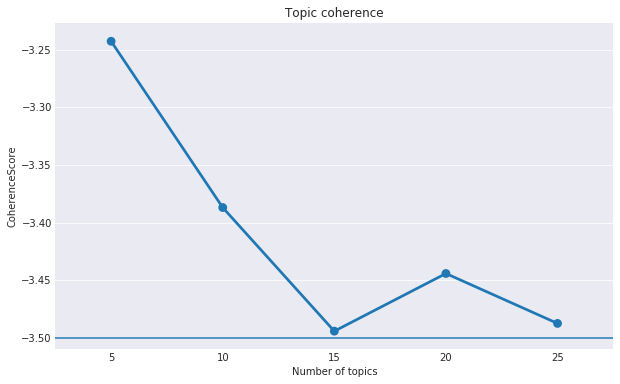

In [44]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'CoherenceScore':coherenceList_umass})
f,ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")
sns.pointplot(x='Number of topics',y= 'CoherenceScore',data=plotData)
plt.axhline(y=-3.5)
plt.title('Topic coherence')
plt.savefig('Topic coherence plot.png')

In [45]:
num_topics =15
Lda = models.LdaMulticore
lda= Lda(doc_term_matrix, num_topics=num_topics,id2word = dictionary, 
         passes=5,chunksize=8000,random_state=42)

INFO : using symmetric alpha at 0.06666666666666667
INFO : using symmetric eta at 0.06666666666666667
INFO : using serial LDA version on this node
INFO : running online LDA training, 15 topics, 5 passes over the supplied corpus of 1186028 documents, updating every 88000 documents, evaluating every ~880000 documents, iterating 50x with a convergence threshold of 0.001000
INFO : training LDA model using 11 processes
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process entering E-step loop
DEBUG : getting a new job
DEBUG : worker process

DEBUG : 6077/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #17 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #40 = documents up to #328000/1186028, outstanding queue size 33
DEBUG : processing chunk #18 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6024/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #41 = documents up to #336000/1186028, outstanding queue size 33
DEBUG : 6127/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #19 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, di

INFO : PROGRESS: pass 0, dispatched chunk #54 = documents up to #440000/1186028, outstanding queue size 33
DEBUG : processing chunk #34 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #35 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #55 = documents up to #448000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 0, dispatched chunk #56 = documents up to #456000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 0, dispatched chunk #57 = documents up to #464000/1186028, outstanding queue size 32DEBUG : processing chunk #36 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents

INFO : PROGRESS: pass 0, dispatched chunk #58 = documents up to #472000/1186028, outstanding queue size 33
DEBUG : 6432/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DE

INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6435/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #55 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6401/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #12 (0.067): 0.023*"rm" + 0.014*"pink" + 0.012*"new" + 0.010*"size" + 0.009*"woman" + 0.009*"bra" + 0.008*"2" + 0.007*"brand_new" + 0.007*"color" + 0.007*"bundle"
INFO : topic #8 (0.067): 0.025*"new" + 0.014*"case" + 0.014*"black" + 0.012*"brand_new" + 0.012*"man" + 0.011*"accessory" + 0.009*"2" + 0.008*"phone_accessory" + 0.008*"electronic_cell" + 0.007*"color"
INFO : topic #13 (0.067): 0.022*"man" + 0.019*"shirt" + 0.016*"game" + 0.016*"size" +

DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #93 = documents up to #752000/1186028, outstanding queue size 33
DEBUG : 6920/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #71 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #94 = documents up to #760000/1186028, outstanding queue size 33
DEBUG : 6890/8000 documents converged within 50 iterations
DEBUG : processing chunk #72 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #95 = documents up to #768000/1186028, outstanding queue size 33
DEBUG : processing chunk #73 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 6866/8000 docum

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #107 = documents up to #864000/1186028, outstanding queue size 31
DEBUG : 7178/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #89 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 0, dispatched chunk #108 = documents up to #872000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 0, dispatched chunk #109 = documents up to #880000/1186028, outstanding queue size 30
INFO : PROGRESS: pass 0, dispatched chunk #110 = documents up to #888000/1186028, outstanding queue size 31
INFO : PROGRESS: pass 0, dispatched chunk #111 = documents up to #896000/1186028, outstanding queue size 32
DEBUG : 7206/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
I

INFO : PROGRESS: pass 0, dispatched chunk #129 = documents up to #1040000/1186028, outstanding queue size 33
DEBUG : 7316/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #130 = documents up to #1048000/1186028, outstanding queue size 33DEBUG : processing chunk #108 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents

DEBUG : 7271/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : updating topics
DEBUG : result put
DEBUG : getting a new job
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #109 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic #4 (0.067): 0.018*"beauty_makeup" + 0.014*"brand_new" + 0.014*"size" + 0.014*"3" + 0.012*"baby" + 0.012*"new" + 0.010*"2" + 0.009*"beauty_skin" + 0.009*"face" 

DEBUG : getting a new job
DEBUG : processing chunk #124 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #125 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7454/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7411/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #126 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7433/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #127 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7448/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEB

INFO : topic #11 (0.067): 0.010*"book" + 0.010*"nail" + 0.010*"new" + 0.009*"beauty_makeup" + 0.009*"brand_new" + 0.009*"legging" + 0.009*"2" + 0.008*"slime" + 0.008*"kid_toy" + 0.008*"lularoe"
INFO : topic #5 (0.067): 0.031*"size" + 0.026*"woman_athletic" + 0.026*"woman" + 0.020*"legging" + 0.015*"tight_legging" + 0.015*"apparel_pant" + 0.015*"lularoe" + 0.014*"jacket" + 0.013*"pink" + 0.013*"small"
INFO : topic #8 (0.067): 0.027*"case" + 0.019*"new" + 0.018*"phone_accessory" + 0.018*"electronic_cell" + 0.015*"accessory" + 0.013*"brand_new" + 0.010*"2" + 0.009*"black" + 0.009*"iphone" + 0.009*"phone"
INFO : topic diff=0.159845, rho=0.090167
INFO : PROGRESS: pass 0, dispatched chunk #146 = documents up to #1176000/1186028, outstanding queue size 12
DEBUG : 7458/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 0, dispatched chunk #147 = documents up to #1184000/1186028, outstandin

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7635/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #6 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7619/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #7 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #8 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #29 = documents up to #240000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 1, dispatched chunk #30 = documents up to #248000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 1, dispatched chunk #31 = documents up to #256000/1186028, outstanding queue size 30
DEBUG : 7636/

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #27 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #46 = documents up to #376000/1186028, outstanding queue size 26
DEBUG : processing chunk #28 of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #47 = documents up to #384000/1186028, outstanding queue size 27DEBUG : performing inference on a chunk of 8000 documents

INFO : PROGRESS: pass 1, dispatched chunk #48 = documents up to #392000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 1, dispatched chunk #49 = documents up to #400000/1186028, outstanding queue size 29
INFO : PROGRESS: pass 1, dispatched chunk #50 = documents up to #408000/1186028, outstanding queue size 30
DEBUG : 7637/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing

DEBUG : 7676/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #43 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7679/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #44 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7666/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #45 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #46 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7687/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : gettin

DEBUG : updating topics
INFO : merging changes from 96000 documents into a model of 1186028 documents
DEBUG : 7715/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #63 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7718/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7731/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #64 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7704/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #7 (0.067): 0.036*"size" + 0.032*"shirt" + 0.031*"woman" + 0.031*"woman_top" + 0.02

DEBUG : processing chunk #81 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 1, dispatched chunk #95 = documents up to #768000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 1, dispatched chunk #96 = documents up to #776000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 1, dispatched chunk #97 = documents up to #784000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 1, dispatched chunk #98 = documents up to #792000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 1, dispatched chunk #99 = documents up to #800000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 1, dispatched chunk #100 = documents up to #808000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 1, dispatched chunk #101 = documents up to #816000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 1, dispatched chunk #102 = documents up to #824000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 1, dispatched 

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #9 (0.067): 0.025*"woman" + 0.018*"kid_toy" + 0.016*"accessory" + 0.016*"hair" + 0.015*"man" + 0.013*"bundle" + 0.012*"beauty" + 0.010*"new" + 0.009*"box" + 0.009*"vintage_collectible"
INFO : topic #7 (0.067): 0.036*"size" + 0.033*"shirt" + 0.032*"woman_top" + 0.030*"woman" + 0.026*"pink" + 0.021*"small" + 0.017*"victoria_secret" + 0.016*"blouse_t" + 0.013*"black" + 0.013*"blouse"
INFO : topic #14 (0.067): 0.048*"size" + 0.045*"woman" + 0.031*"shoe" + 0.017*"short" + 0.012*"black" + 0.012*"new" + 0.011*"man" + 0.010*"athletic" + 0.009*"boot" + 0.009*"brand_new"
INFO : topic #6 (0.067): 0.033*"bag" + 0.033*"woman" + 0.022*"necklace" + 0.020*"woman_handbag" + 0.014*"gold" + 0.012*"purse" + 0.010*"new" + 0.010*"woman_jewelry" + 0.009*"inch" + 0.009*"pocket"
INFO : topic #10 (0.067): 0.041*"woman" + 0.016*"beauty_fragrance" + 0.014*"new" + 0.014*"brand_new" + 0.012*"size" + 0.012*"hat" + 0

DEBUG : getting a new job
DEBUG : 7780/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #115 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7774/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #116 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7753/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #117 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7759/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
DEBUG : processing chunk #118 of 8000 do

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7790/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7767/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #134 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7771/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #135 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7768/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #136 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7771/8000 documents conv

INFO : PROGRESS: pass 2, dispatched chunk #0 = documents up to #8000/1186028, outstanding queue size 1
INFO : PROGRESS: pass 2, dispatched chunk #1 = documents up to #16000/1186028, outstanding queue size 2
INFO : PROGRESS: pass 2, dispatched chunk #2 = documents up to #24000/1186028, outstanding queue size 3
INFO : PROGRESS: pass 2, dispatched chunk #3 = documents up to #32000/1186028, outstanding queue size 4
INFO : PROGRESS: pass 2, dispatched chunk #4 = documents up to #40000/1186028, outstanding queue size 5
INFO : PROGRESS: pass 2, dispatched chunk #5 = documents up to #48000/1186028, outstanding queue size 6
INFO : PROGRESS: pass 2, dispatched chunk #6 = documents up to #56000/1186028, outstanding queue size 7
INFO : PROGRESS: pass 2, dispatched chunk #7 = documents up to #64000/1186028, outstanding queue size 8
INFO : PROGRESS: pass 2, dispatched chunk #8 = documents up to #72000/1186028, outstanding queue size 9
INFO : PROGRESS: pass 2, dispatched chunk #9 = documents up to #8

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #19 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7801/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7782/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #20 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #21 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7801/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7789/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #0 (0.067): 0.045*"dress" + 0.028*"

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #37 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #52 = documents up to #424000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 2, dispatched chunk #53 = documents up to #432000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 2, dispatched chunk #54 = documents up to #440000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 2, dispatched chunk #55 = documents up to #448000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 2, dispatched chunk #56 = documents up to #456000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 2, dispatched chunk #57 = documents up to #464000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 2, dispatched chunk #58 = documents up to #472000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 2, dispatched chunk #59 = documents

DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #55 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
INFO : topic #13 (0.067): 0.061*"man" + 0.045*"game" + 0.036*"shirt" + 0.027*"electronic_video" + 0.026*"game_console" + 0.017*"pant" + 0.014*"size" + 0.013*"top_t" + 0.010*"new" + 0.008*"2"
INFO : topic #1 (0.067): 0.037*"jean" + 0.029*"bracelet" + 0.026*"woman" + 0.022*"size" + 0.016*"home" + 0.016*"skinny" + 0.012*"pair" + 0.011*"sock" + 0.011*"jean_slim" + 0.010*"woman_jewelry"
INFO : topic #0 (0.067): 0.047*"dress" + 0.028*"size" + 0.022*"ring" + 0.018*"woman" + 0.016*"woman_jewelry" + 0.015*"earring" + 0.014*"dress_knee" + 0.012*"black" + 0.012*"mini" + 0.011*"white"
INFO : topic #2 (0.067): 0.034*"beauty_makeup" + 0.018*"color" + 0.016*"lip" + 0.013*"new" + 0.013*"brand_new" + 0.013*"face" + 0.013*"eye" + 0.011*"1" + 0.011*"skin" + 0.010*"makeup"
INFO : topic #8 (0.067): 0.036*"case" + 0.

INFO : PROGRESS: pass 2, dispatched chunk #94 = documents up to #760000/1186028, outstanding queue size 29
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #72 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7842/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7833/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #73 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 2, dispatched chunk #95 = documents up to #768000/1186028, outstanding queue size 28
INFO : PROGRESS: pass 2, dispatched chunk #96 = documents up to #776000/1186028, outstanding queue size 29
DEBUG : 7845/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : resu

INFO : topic #10 (0.067): 0.045*"woman" + 0.018*"beauty_fragrance" + 0.016*"new" + 0.014*"man" + 0.014*"hat" + 0.014*"brand_new" + 0.013*"perfume" + 0.011*"jersey" + 0.011*"❤" + 0.010*"size"
INFO : topic #5 (0.067): 0.037*"woman_athletic" + 0.034*"size" + 0.028*"legging" + 0.026*"woman" + 0.025*"lularoe" + 0.021*"tight_legging" + 0.021*"apparel_pant" + 0.017*"jacket" + 0.014*"pink" + 0.014*"black"
DEBUG : processing chunk #90 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic diff=0.042939, rho=0.081311
INFO : PROGRESS: pass 2, dispatched chunk #108 = documents up to #872000/1186028, outstanding queue size 27
DEBUG : 7814/8000 documents converged within 50 iterations
DEBUG : processing chunk #91 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #92 of 8000 documents
DEBUG : performing inference on a chunk of 80

INFO : PROGRESS: pass 2, dispatched chunk #130 = documents up to #1048000/1186028, outstanding queue size 28
DEBUG : 7842/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #108 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : updating topics
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : 7845/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #109 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7825/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #110 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7855/8000 documents

DEBUG : 7841/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #126 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7833/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #127 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7854/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #128 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #129 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7824/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 2, disp

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #146 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #147 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7843/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #148 of 2028 documents
DEBUG : performing inference on a chunk of 2028 documents
DEBUG : processed chunk, queuing the result
DEBUG : 7842/8000 documents converged within 50 iterations
DEBUG : result put
DEBUG : getting a new job
DEBUG : 1991/2028 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7862/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7843/8000 documents converged within 

DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 3, dispatched chunk #33 = documents up to #272000/1186028, outstanding queue size 27
DEBUG : 7852/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 3, dispatched chunk #34 = documents up to #280000/1186028, outstanding queue size 28
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #12 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 3, dispatched chunk #35 = documents up to #288000/1186028, outstanding queue size 28
DEBUG : 7848/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #13 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7861/8000 documents converged within 50 iterations
DEBUG : processed chunk, 

INFO : topic #14 (0.067): 0.053*"size" + 0.048*"woman" + 0.039*"shoe" + 0.020*"short" + 0.015*"man" + 0.014*"black" + 0.013*"boot" + 0.012*"athletic" + 0.012*"new" + 0.011*"nike"
INFO : topic #4 (0.067): 0.023*"baby" + 0.021*"3" + 0.020*"0_24" + 0.017*"kid_girl" + 0.016*"2" + 0.014*"size" + 0.014*"mo" + 0.013*"kid_boy" + 0.013*"new" + 0.013*"beauty_skin"
INFO : topic #12 (0.067): 0.043*"rm" + 0.022*"bra" + 0.018*"home_décor" + 0.016*"home" + 0.013*"pink" + 0.013*"shipping" + 0.012*"2" + 0.011*"card" + 0.009*"woman_underwear" + 0.009*"1"
DEBUG : 7853/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #31 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic diff=0.037866, rho=0.081043
INFO : PROGRESS: pass 3, dispatched chunk #48 = documents up to #392000/1186028, outstanding queue size 26
DEBUG : 7860/8000 documents converged within 50 iteratio

DEBUG : processing chunk #48 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 3, dispatched chunk #70 = documents up to #568000/1186028, outstanding queue size 28
DEBUG : 7868/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #49 of 8000 documents
INFO : PROGRESS: pass 3, dispatched chunk #71 = documents up to #576000/1186028, outstanding queue size 28
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7884/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #50 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 3, dispatched chunk #72 = documents up to #584000/1186028, outstanding queue size 28
DEBUG : 7869/8000 documents converged within 50 iterations
DEBUG : p

DEBUG : getting a new job
DEBUG : processing chunk #65 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic diff=0.035973, rho=0.081043
INFO : PROGRESS: pass 3, dispatched chunk #84 = documents up to #680000/1186028, outstanding queue size 28
DEBUG : processing chunk #66 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7841/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7877/8000 documents converged within 50 iterations
DEBUG : processing chunk #67 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #68 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 3, dispatched chunk #85 = documents up to #688000/1186028, outstanding queue size 22
INF

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #85 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 3, dispatched chunk #108 = documents up to #872000/1186028, outstanding queue size 30
DEBUG : 7836/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #86 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7862/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7855/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #87 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7873/8000 documents converged within 50 iterations
DEBUG : processe

INFO : topic #12 (0.067): 0.044*"rm" + 0.021*"bra" + 0.019*"home_décor" + 0.017*"home" + 0.013*"pink" + 0.013*"shipping" + 0.012*"2" + 0.011*"card" + 0.010*"1" + 0.009*"accent"
INFO : topic #6 (0.067): 0.047*"woman" + 0.043*"bag" + 0.024*"woman_handbag" + 0.021*"necklace" + 0.017*"purse" + 0.012*"pocket" + 0.012*"gold" + 0.010*"new" + 0.010*"leather" + 0.010*"wallet"
INFO : topic #0 (0.067): 0.054*"dress" + 0.027*"size" + 0.022*"ring" + 0.022*"woman" + 0.018*"woman_jewelry" + 0.017*"dress_knee" + 0.017*"earring" + 0.016*"mini" + 0.014*"length" + 0.012*"black"
DEBUG : processing chunk #104 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic diff=0.034983, rho=0.081043
INFO : PROGRESS: pass 3, dispatched chunk #121 = documents up to #976000/1186028, outstanding queue size 25
DEBUG : 7858/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #105 o

DEBUG : processing chunk #123 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #124 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7863/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : PROGRESS: pass 3, dispatched chunk #138 = documents up to #1112000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 3, dispatched chunk #139 = documents up to #1120000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 3, dispatched chunk #140 = documents up to #1128000/1186028, outstanding queue size 22
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7860/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : processing chunk #125 of 8000 documents
DEBUG : result put
DEBUG : getting a new job
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updati

DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7870/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #142 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #143 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7869/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #144 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7875/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #145 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7862/8000 documents converged within 50 iterations
DEBUG : process

DEBUG : processing chunk #5 of 8000 documents
INFO : PROGRESS: pass 4, dispatched chunk #28 = documents up to #232000/1186028, outstanding queue size 29
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7865/8000 documents converged within 50 iterations
DEBUG : processing chunk #6 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : PROGRESS: pass 4, dispatched chunk #29 = documents up to #240000/1186028, outstanding queue size 29
DEBUG : 7857/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #7 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7874/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #8 of

DEBUG : 7877/8000 documents converged within 50 iterations
INFO : PROGRESS: pass 4, dispatched chunk #43 = documents up to #352000/1186028, outstanding queue size 22
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #27 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7883/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #28 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
INFO : merging changes from 96000 documents into a model of 1186028 documents
DEBUG : 7891/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #29 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7871/8000 documents conv

DEBUG : processed chunk, queuing the result
DEBUG : result put
INFO : topic #10 (0.067): 0.048*"woman" + 0.020*"beauty_fragrance" + 0.017*"new" + 0.016*"hat" + 0.015*"man" + 0.014*"perfume" + 0.014*"brand_new" + 0.013*"❤" + 0.013*"jersey" + 0.011*"accessory_hat"
DEBUG : getting a new job
DEBUG : processing chunk #43 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : topic diff=0.031035, rho=0.080778
INFO : PROGRESS: pass 4, dispatched chunk #62 = documents up to #504000/1186028, outstanding queue size 28
DEBUG : processing chunk #44 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7880/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7870/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #45 of 8000 documents
DEBUG : pe

DEBUG : processing chunk #61 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : updating topics
DEBUG : 7893/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : merging changes from 88000 documents into a model of 1186028 documents
DEBUG : processing chunk #62 of 8000 documents
DEBUG : result put
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : getting a new job
DEBUG : processing chunk #63 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7880/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7882/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7877/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a

DEBUG : getting a new job
DEBUG : processing chunk #79 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #80 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
INFO : PROGRESS: pass 4, dispatched chunk #96 = documents up to #776000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 4, dispatched chunk #97 = documents up to #784000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 4, dispatched chunk #98 = documents up to #792000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 4, dispatched chunk #99 = documents up to #800000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 4, dispatched chunk #100 = documents up to #808000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 4, dispatched chunk #101 = documents up to #816000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 4, dispatched chunk #102 = documents up to #824000/1186028, outstanding queue size 27
DEBUG : 7891

DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #98 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7879/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
INFO : topic #6 (0.067): 0.051*"woman" + 0.046*"bag" + 0.025*"woman_handbag" + 0.019*"necklace" + 0.018*"purse" + 0.013*"pocket" + 0.011*"leather" + 0.011*"gold" + 0.011*"wallet" + 0.011*"new"
INFO : topic #0 (0.067): 0.056*"dress" + 0.027*"size" + 0.024*"woman" + 0.022*"ring" + 0.019*"woman_jewelry" + 0.018*"dress_knee" + 0.017*"mini" + 0.017*"earring" + 0.016*"length" + 0.012*"black"
INFO : topic #3 (0.067): 0.049*"item" + 0.020*"shipping" + 0.015*"day" + 0.013*"home_kitchen" + 0.012*"2" + 0.011*"1" + 0.011*"new" + 0.011*"rae" + 0.010*"price" + 0.010*"rm"
DEBUG : 7866/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
INFO : topic #7 (0.067): 0.042*"siz

INFO : PROGRESS: pass 4, dispatched chunk #131 = documents up to #1056000/1186028, outstanding queue size 20
INFO : PROGRESS: pass 4, dispatched chunk #132 = documents up to #1064000/1186028, outstanding queue size 21
INFO : PROGRESS: pass 4, dispatched chunk #133 = documents up to #1072000/1186028, outstanding queue size 22
INFO : PROGRESS: pass 4, dispatched chunk #134 = documents up to #1080000/1186028, outstanding queue size 23
INFO : PROGRESS: pass 4, dispatched chunk #135 = documents up to #1088000/1186028, outstanding queue size 24
INFO : PROGRESS: pass 4, dispatched chunk #136 = documents up to #1096000/1186028, outstanding queue size 25
INFO : PROGRESS: pass 4, dispatched chunk #137 = documents up to #1104000/1186028, outstanding queue size 26
INFO : PROGRESS: pass 4, dispatched chunk #138 = documents up to #1112000/1186028, outstanding queue size 27
INFO : PROGRESS: pass 4, dispatched chunk #139 = documents up to #1120000/1186028, outstanding queue size 28
DEBUG : 7895/8000 d

INFO : topic #13 (0.067): 0.084*"man" + 0.053*"game" + 0.041*"shirt" + 0.031*"electronic_video" + 0.029*"game_console" + 0.014*"top_t" + 0.013*"size" + 0.010*"new" + 0.009*"2" + 0.009*"polo"
INFO : topic diff=0.027042, rho=0.080778
DEBUG : processing chunk #133 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7901/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : 7889/8000 documents converged within 50 iterations
DEBUG : processed chunk, queuing the result
DEBUG : result put
DEBUG : getting a new job
DEBUG : processing chunk #134 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #135 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : processing chunk #136 of 8000 documents
DEBUG : performing inference on a chunk of 8000 documents
DEBUG : 7880/8000 documents converged within 50 

In [58]:
num_topics =15
vis = pyLDAvis.gensim.prepare(lda, doc_term_matrix, dictionary,sort_topics=False)
pyLDAvis.save_html(vis,f'pyLDAvis_{num_topics}.html')

DEBUG : performing inference on a chunk of 1186028 documents
DEBUG : 1170696/1186028 documents converged within 50 iterations


In [59]:
pyLDAvis.enable_notebook()
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.105992 -0.139042       1        1   6.541109
1     -0.080590 -0.052679       2        1   4.451007
2      0.150754 -0.028283       3        1  10.564756
3      0.174307 -0.038508       4        1   6.533017
4      0.058099  0.153225       5        1   5.707425
5     -0.218605  0.020521       6        1   9.543053
6     -0.064397 -0.147733       7        1   6.462804
7     -0.218374  0.003631       8        1  10.656355
8      0.149326 -0.026998       9        1   7.956305
9      0.111801  0.087286      10        1   4.041940
10     0.025020 -0.035209      11        1   4.071248
11     0.132513  0.024881      12        1   4.923011
12     0.106232 -0.082569      13        1   5.931906
13    -0.067733  0.228336      14        1   4.515010
14    -0.152363  0.033141      15        1   8.101048, topic_info=     Category           Freq              Term          Total  loglift  \
term                                                                     
70    Default  371833.000000             woman  371833.000000  30.0000   
106   Default  126240.000000               man  126240.000000  29.0000   
441   Default  137716.000000             shirt  137716.000000  28.0000   
466   Default   79502.000000             dress   79502.000000  27.0000   
158   Default   93641.000000    woman_athletic   93641.000000  26.0000   
80    Default   96818.000000     beauty_makeup   96818.000000  25.0000   
313   Default   74787.000000              shoe   74787.000000  24.0000   
248   Default   84257.000000         woman_top   84257.000000  23.0000   
40    Default  387106.000000              size  387106.000000  22.0000   
653   Default   72650.000000               bag   72650.000000  21.0000   
320   Default   50174.000000              game   50174.000000  20.0000   
272   Default   72642.000000              case   72642.000000  19.0000   
5     Default   63318.000000           legging   63318.000000  18.0000   
485   Default   51754.000000              jean   51754.000000  17.0000   
55    Default  109416.000000              item  109416.000000  16.0000   
6     Default   62746.000000           lularoe   62746.000000  15.0000   
221   Default   46148.000000           kid_toy   46148.000000  14.0000   
157   Default   45821.000000     tight_legging   45821.000000  13.0000   
284   Default   42140.000000   phone_accessory   42140.000000  12.0000   
153   Default   45669.000000      apparel_pant   45669.000000  11.0000   
276   Default   42028.000000   electronic_cell   42028.000000  10.0000   
186   Default  146487.000000                rm  146487.000000   9.0000   
1522  Default   49439.000000            blouse   49439.000000   8.0000   
356   Default   35102.000000     woman_handbag   35102.000000   7.0000   
319   Default   29490.000000  electronic_video   29490.000000   6.0000   
253   Default   29457.000000          bracelet   29457.000000   5.0000   
321   Default   27865.000000      game_console   27865.000000   4.0000   
86    Default   41907.000000               lip   41907.000000   3.0000   
648   Default   48044.000000               bra   48044.000000   2.0000   
395   Default   37460.000000            jacket   37460.000000   1.0000   
...       ...            ...               ...            ...      ...   
1774  Topic15    4009.228027           slipper    4198.949219   2.4669   
2729  Topic15    9082.270508            jordan    9856.148438   2.4314   
4557  Topic15    4561.125000               toe    4893.267578   2.4429   
304   Topic15    5869.714844               8.5    6585.931152   2.3980   
2267  Topic15    5538.535645               van    6191.299805   2.4018   
2617  Topic15    2228.597412               ugg    2335.498047   2.4663   
365   Topic15   35746.500000             short   53617.250000   2.1078   
94    Topic15    5953.847656               7.5    7075.423828   2.3406   
776  

In [60]:
a = lda.show_topics(num_topics=15,formatted=False,num_words=10)
b = lda.top_topics(doc_term_matrix,dictionary=dictionary,topn=10) # This orders the topics in the decreasing order of coherence score

DEBUG : Setting topics to those of the model: LdaModel(num_terms=329852, num_topics=15, decay=0.5, chunksize=8000)
INFO : CorpusAccumulator accumulated stats from 1000 documents
INFO : CorpusAccumulator accumulated stats from 2000 documents
INFO : CorpusAccumulator accumulated stats from 3000 documents
INFO : CorpusAccumulator accumulated stats from 4000 documents
INFO : CorpusAccumulator accumulated stats from 5000 documents
INFO : CorpusAccumulator accumulated stats from 6000 documents
INFO : CorpusAccumulator accumulated stats from 7000 documents
INFO : CorpusAccumulator accumulated stats from 8000 documents
INFO : CorpusAccumulator accumulated stats from 9000 documents
INFO : CorpusAccumulator accumulated stats from 10000 documents
INFO : CorpusAccumulator accumulated stats from 11000 documents
INFO : CorpusAccumulator accumulated stats from 12000 documents
INFO : CorpusAccumulator accumulated stats from 13000 documents
INFO : CorpusAccumulator accumulated stats from 14000 document

INFO : CorpusAccumulator accumulated stats from 127000 documents
INFO : CorpusAccumulator accumulated stats from 128000 documents
INFO : CorpusAccumulator accumulated stats from 129000 documents
INFO : CorpusAccumulator accumulated stats from 130000 documents
INFO : CorpusAccumulator accumulated stats from 131000 documents
INFO : CorpusAccumulator accumulated stats from 132000 documents
INFO : CorpusAccumulator accumulated stats from 133000 documents
INFO : CorpusAccumulator accumulated stats from 134000 documents
INFO : CorpusAccumulator accumulated stats from 135000 documents
INFO : CorpusAccumulator accumulated stats from 136000 documents
INFO : CorpusAccumulator accumulated stats from 137000 documents
INFO : CorpusAccumulator accumulated stats from 138000 documents
INFO : CorpusAccumulator accumulated stats from 139000 documents
INFO : CorpusAccumulator accumulated stats from 140000 documents
INFO : CorpusAccumulator accumulated stats from 141000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 254000 documents
INFO : CorpusAccumulator accumulated stats from 255000 documents
INFO : CorpusAccumulator accumulated stats from 256000 documents
INFO : CorpusAccumulator accumulated stats from 257000 documents
INFO : CorpusAccumulator accumulated stats from 258000 documents
INFO : CorpusAccumulator accumulated stats from 259000 documents
INFO : CorpusAccumulator accumulated stats from 260000 documents
INFO : CorpusAccumulator accumulated stats from 261000 documents
INFO : CorpusAccumulator accumulated stats from 262000 documents
INFO : CorpusAccumulator accumulated stats from 263000 documents
INFO : CorpusAccumulator accumulated stats from 264000 documents
INFO : CorpusAccumulator accumulated stats from 265000 documents
INFO : CorpusAccumulator accumulated stats from 266000 documents
INFO : CorpusAccumulator accumulated stats from 267000 documents
INFO : CorpusAccumulator accumulated stats from 268000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 381000 documents
INFO : CorpusAccumulator accumulated stats from 382000 documents
INFO : CorpusAccumulator accumulated stats from 383000 documents
INFO : CorpusAccumulator accumulated stats from 384000 documents
INFO : CorpusAccumulator accumulated stats from 385000 documents
INFO : CorpusAccumulator accumulated stats from 386000 documents
INFO : CorpusAccumulator accumulated stats from 387000 documents
INFO : CorpusAccumulator accumulated stats from 388000 documents
INFO : CorpusAccumulator accumulated stats from 389000 documents
INFO : CorpusAccumulator accumulated stats from 390000 documents
INFO : CorpusAccumulator accumulated stats from 391000 documents
INFO : CorpusAccumulator accumulated stats from 392000 documents
INFO : CorpusAccumulator accumulated stats from 393000 documents
INFO : CorpusAccumulator accumulated stats from 394000 documents
INFO : CorpusAccumulator accumulated stats from 395000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 508000 documents
INFO : CorpusAccumulator accumulated stats from 509000 documents
INFO : CorpusAccumulator accumulated stats from 510000 documents
INFO : CorpusAccumulator accumulated stats from 511000 documents
INFO : CorpusAccumulator accumulated stats from 512000 documents
INFO : CorpusAccumulator accumulated stats from 513000 documents
INFO : CorpusAccumulator accumulated stats from 514000 documents
INFO : CorpusAccumulator accumulated stats from 515000 documents
INFO : CorpusAccumulator accumulated stats from 516000 documents
INFO : CorpusAccumulator accumulated stats from 517000 documents
INFO : CorpusAccumulator accumulated stats from 518000 documents
INFO : CorpusAccumulator accumulated stats from 519000 documents
INFO : CorpusAccumulator accumulated stats from 520000 documents
INFO : CorpusAccumulator accumulated stats from 521000 documents
INFO : CorpusAccumulator accumulated stats from 522000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 635000 documents
INFO : CorpusAccumulator accumulated stats from 636000 documents
INFO : CorpusAccumulator accumulated stats from 637000 documents
INFO : CorpusAccumulator accumulated stats from 638000 documents
INFO : CorpusAccumulator accumulated stats from 639000 documents
INFO : CorpusAccumulator accumulated stats from 640000 documents
INFO : CorpusAccumulator accumulated stats from 641000 documents
INFO : CorpusAccumulator accumulated stats from 642000 documents
INFO : CorpusAccumulator accumulated stats from 643000 documents
INFO : CorpusAccumulator accumulated stats from 644000 documents
INFO : CorpusAccumulator accumulated stats from 645000 documents
INFO : CorpusAccumulator accumulated stats from 646000 documents
INFO : CorpusAccumulator accumulated stats from 647000 documents
INFO : CorpusAccumulator accumulated stats from 648000 documents
INFO : CorpusAccumulator accumulated stats from 649000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 762000 documents
INFO : CorpusAccumulator accumulated stats from 763000 documents
INFO : CorpusAccumulator accumulated stats from 764000 documents
INFO : CorpusAccumulator accumulated stats from 765000 documents
INFO : CorpusAccumulator accumulated stats from 766000 documents
INFO : CorpusAccumulator accumulated stats from 767000 documents
INFO : CorpusAccumulator accumulated stats from 768000 documents
INFO : CorpusAccumulator accumulated stats from 769000 documents
INFO : CorpusAccumulator accumulated stats from 770000 documents
INFO : CorpusAccumulator accumulated stats from 771000 documents
INFO : CorpusAccumulator accumulated stats from 772000 documents
INFO : CorpusAccumulator accumulated stats from 773000 documents
INFO : CorpusAccumulator accumulated stats from 774000 documents
INFO : CorpusAccumulator accumulated stats from 775000 documents
INFO : CorpusAccumulator accumulated stats from 776000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 889000 documents
INFO : CorpusAccumulator accumulated stats from 890000 documents
INFO : CorpusAccumulator accumulated stats from 891000 documents
INFO : CorpusAccumulator accumulated stats from 892000 documents
INFO : CorpusAccumulator accumulated stats from 893000 documents
INFO : CorpusAccumulator accumulated stats from 894000 documents
INFO : CorpusAccumulator accumulated stats from 895000 documents
INFO : CorpusAccumulator accumulated stats from 896000 documents
INFO : CorpusAccumulator accumulated stats from 897000 documents
INFO : CorpusAccumulator accumulated stats from 898000 documents
INFO : CorpusAccumulator accumulated stats from 899000 documents
INFO : CorpusAccumulator accumulated stats from 900000 documents
INFO : CorpusAccumulator accumulated stats from 901000 documents
INFO : CorpusAccumulator accumulated stats from 902000 documents
INFO : CorpusAccumulator accumulated stats from 903000 documents
INFO : CorpusAccumulator 

INFO : CorpusAccumulator accumulated stats from 1015000 documents
INFO : CorpusAccumulator accumulated stats from 1016000 documents
INFO : CorpusAccumulator accumulated stats from 1017000 documents
INFO : CorpusAccumulator accumulated stats from 1018000 documents
INFO : CorpusAccumulator accumulated stats from 1019000 documents
INFO : CorpusAccumulator accumulated stats from 1020000 documents
INFO : CorpusAccumulator accumulated stats from 1021000 documents
INFO : CorpusAccumulator accumulated stats from 1022000 documents
INFO : CorpusAccumulator accumulated stats from 1023000 documents
INFO : CorpusAccumulator accumulated stats from 1024000 documents
INFO : CorpusAccumulator accumulated stats from 1025000 documents
INFO : CorpusAccumulator accumulated stats from 1026000 documents
INFO : CorpusAccumulator accumulated stats from 1027000 documents
INFO : CorpusAccumulator accumulated stats from 1028000 documents
INFO : CorpusAccumulator accumulated stats from 1029000 documents
INFO : Cor

INFO : CorpusAccumulator accumulated stats from 1140000 documents
INFO : CorpusAccumulator accumulated stats from 1141000 documents
INFO : CorpusAccumulator accumulated stats from 1142000 documents
INFO : CorpusAccumulator accumulated stats from 1143000 documents
INFO : CorpusAccumulator accumulated stats from 1144000 documents
INFO : CorpusAccumulator accumulated stats from 1145000 documents
INFO : CorpusAccumulator accumulated stats from 1146000 documents
INFO : CorpusAccumulator accumulated stats from 1147000 documents
INFO : CorpusAccumulator accumulated stats from 1148000 documents
INFO : CorpusAccumulator accumulated stats from 1149000 documents
INFO : CorpusAccumulator accumulated stats from 1150000 documents
INFO : CorpusAccumulator accumulated stats from 1151000 documents
INFO : CorpusAccumulator accumulated stats from 1152000 documents
INFO : CorpusAccumulator accumulated stats from 1153000 documents
INFO : CorpusAccumulator accumulated stats from 1154000 documents
INFO : Cor

In [61]:
topic2skillb = {}
topic2csb = {}
topic2skilla = {}
topic2csa = {}
num_topics =lda.num_topics
cnt =1

for ws in b:
    wset = set(w[1] for w in ws[0])
    topic2skillb[cnt] = wset
    topic2csb[cnt] = ws[1]
    cnt +=1

for ws in a:
    wset = set(w[0]for w in ws[1])
    topic2skilla[ws[0]+1] = wset

In [62]:
for i in range(1,num_topics+1):
    for j in range(1,num_topics+1):  
        if topic2skilla[i].intersection(topic2skillb[j])==topic2skilla[i]:
            topic2csa[i] = topic2csb[j]

In [63]:
finalData = pd.DataFrame([],columns=['Topic','words'])
finalData['Topic']=topic2skilla.keys()
finalData['Topic'] = finalData['Topic'].apply(lambda x: 'Topic'+str(x))
finalData['words']=topic2skilla.values()
finalData['cs'] = topic2csa.values()
finalData.sort_values(by='cs',ascending=False,inplace=True)
# finalData.to_csv('CoherenceScore.csv')
finalData

,Topic,words,cs
8,Topic9,"{brand_new, case, iphone, electronic_cell, pho...",-1.719978
4,Topic5,"{0_24, baby, t, kid_girl, size, 2, kid_boy, mo...",-2.223498
7,Topic8,"{woman, blouse_t, pink, small, blouse, victori...",-2.326963
2,Topic3,"{brand_new, eye, skin, new, color, lip, face, ...",-2.439212
3,Topic4,"{1, day, shipping, item, price, rm, 2, home_ki...",-2.445025
5,Topic6,"{woman_athletic, tight_legging, woman, apparel...",-2.608073
14,Topic15,"{woman, boot, athletic, shoe, short, black, ne...",-2.652402
6,Topic7,"{wallet, bag, woman, necklace, purse, gold, po...",-2.802160
12,Topic13,"{1, accent, shipping, pink, home, card, rm, ho...",-3.222567
11,Topic12,"{brand_new, kid, 2, slime, disney, book, new, ...",-3.457248


In [65]:
pd.set_option('display.max_colwidth',200)
finalData

,Topic,words,cs
8,Topic9,"{brand_new, case, iphone, electronic_cell, phone, case_skin, phone_accessory, accessory, new, charger}",-1.719978
4,Topic5,"{0_24, baby, t, kid_girl, size, 2, kid_boy, mo, 3, girl}",-2.223498
7,Topic8,"{woman, blouse_t, pink, small, blouse, victoria_secret, woman_top, medium, shirt, size}",-2.326963
2,Topic3,"{brand_new, eye, skin, new, color, lip, face, brush, makeup, beauty_makeup}",-2.439212
3,Topic4,"{1, day, shipping, item, price, rm, 2, home_kitchen, rae, new}",-2.445025
5,Topic6,"{woman_athletic, tight_legging, woman, apparel_pant, jacket, black, lularoe, legging, size, apparel}",-2.608073
14,Topic15,"{woman, boot, athletic, shoe, short, black, new, size, nike, man}",-2.652402
6,Topic7,"{wallet, bag, woman, necklace, purse, gold, pocket, new, woman_handbag, leather}",-2.802160
12,Topic13,"{1, accent, shipping, pink, home, card, rm, home_décor, 2, bra}",-3.222567
11,Topic12,"{brand_new, kid, 2, slime, disney, book, new, toy, kid_toy, nail}",-3.457248


In [66]:
doc2topic =lda.get_document_topics(doc_term_matrix,minimum_probability=0)
doc2topic = pd.DataFrame(list(doc2topic))
num_topics = lda.num_topics
doc2topic.columns = ['Topic'+str(i+1) for i in range(num_topics)]
for i in range(len(doc2topic.columns)):
    doc2topic.iloc[:,i]=doc2topic.iloc[:,i].apply(lambda x: x[1])
doc2topic['Automated_topic_id'] =doc2topic.apply(lambda x: np.argmax(x),axis=1)
doc2topic.head()

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Automated_topic_id
0,0.007407,0.007407,0.007407,0.007407,0.007407,0.529548,0.007407,0.007407,0.007407,0.007407,0.007407,0.007407,0.007407,0.007407,0.374155,Topic6
1,0.011111,0.011111,0.011111,0.844444,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,Topic4
2,0.001481,0.036847,0.442400,0.001481,0.279305,0.001481,0.001481,0.001481,0.001481,0.225152,0.001481,0.001481,0.001481,0.001481,0.001481,Topic3
3,0.001667,0.001667,0.001667,0.132233,0.001667,0.767052,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.080715,0.001667,Topic6
4,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.692227,0.107801,0.006667,0.006667,0.006667,0.119972,0.006667,0.006667,Topic8


In [100]:
def get_relevant_words(vis,lam=0.3,topn=5):
    a = vis.topic_info
    a['finalscore'] = a['logprob']*lam+(1-lam)*a['loglift']
    a = a.loc[:,['Category','Term','finalscore']].groupby(['Category'])\
    .apply(lambda x: x.sort_values(by='finalscore',ascending=False).head(topn))
    a = a.loc[:,'Term'].reset_index().loc[:,['Category','Term']]
    a = a[a['Category']!='Default']
    a = a.to_dict('split')['data']
    d ={}
    for k,v in a: 
        if k not in d.keys():
            d[k] =set()
            d[k].add(v)
        else:
            d[k].add(v)
    finalData = pd.DataFrame([],columns=['Topic','Relevance_words'])
    finalData['Topic']=d.keys()
    finalData['Relevance_words']=d.values()
    return finalData

In [103]:
from itertools import chain
rel_words_per_topic = get_relevant_words(vis,lam=0.55)
rel_word_list = list(chain.from_iterable(rel_words_per_topic.Relevance_words.tolist()))

In [104]:
rel_word_list = [w for w in rel_word_list if len(w)>2]
rel_word_list2id = [dictionary.token2id[w] for w in rel_word_list]
dictionary.filter_tokens(good_ids=rel_word_list2id)
doc_term_matrix =p.map(dictionary.doc2bow,tokenized_text)

In [146]:
doc_matric = pd.DataFrame(0, index=np.arange(len(doc_term_matrix)),columns = dictionary.keys())
for index,record in tqdm(enumerate(doc_term_matrix)):
    for col in record:
        doc_matric[index,col[0]] =col[1]

In [1]:
import pickle 
with open('relevant_words.pkl','rb') as f:
    data = pickle.load(f)

In [4]:
import pandas as pd

In [6]:
pd.set_option('display.max_colwidth',300)
data

,Topic,Relevance_words
0,Topic1,"{blouse, woman_top, shirt, size, blouse_t}"
1,Topic10,"{bra, victoria_secret, brush, woman_underwear, pantie}"
2,Topic11,"{case_skin, phone_accessory, case, iphone, electronic_cell}"
3,Topic12,"{woman_handbag, purse, coach, bag, woman}"
4,Topic13,"{game, electronic_video, console, game_console, slime}"
5,Topic14,"{rae, home_kitchen, kid_toy, item, mug}"
6,Topic15,"{phone_accessory, phone, case, iphone, electronic_cell}"
7,Topic2,"{accessory, audio_surveillance, electronic_tv, hair, headphone}"
8,Topic3,"{jean, woman, size, shoe, man}"
9,Topic4,"{rm, ring, earring, necklace, woman_jewelry}"
